Import libraries

In [1]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('tibble'))
suppressMessages(library('tidyverse'))
suppressMessages(library('gridExtra'))
suppressMessages(library('tidyr'))
suppressMessages(library('scales'))

library(ggplot2)
library(dplyr)
library(tidyr)
library(tibble)
library(scales)
library(tidyverse)
library(gridExtra)

# Exercise 1

The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes [1]. Create vectors, holding the lake’s name and all the parameters and build a dataframe called scottish.lakes from the vectors
- evaluate the highest and lowest volume and area lake
- order the frame with respect to the area and determine the two largest area lakes
- by summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [2]:
loch <- c('Loch Ness', 'Loch Lomond', 'Loch Morar', 'Loch Tay', 'Loch Awe', 'Loch Maree', 'Loch Ericht', 'Loch Lochy',
         'Loch Rannoch', 'Loch Shiel', 'Loch Katrine', 'Loch Arkaig', 'Loch Shin')
volume <- c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35)
area <- c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4, 16, 22.5)
length <- c(39, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8)
max_depth <- c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49)
mean_depth <- c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5)

scottish.lakes <- data.frame(loch, volume, area, length, max_depth, mean_depth)

scottish.lakes

loch,volume,area,length,max_depth,mean_depth
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0
Loch Shiel,0.79,19.5,28.0,128,40.0


### 1.1
evaluate the highest and lowest volume and area lake

In [3]:
max_v <- scottish.lakes[which.max(scottish.lakes$volume),] #which max returns index where I have max value
min_v <- scottish.lakes[which.min(scottish.lakes$volume),]

max_a <- scottish.lakes[which.max(scottish.lakes$area),] #which max returns index where I have max value
min_a <- scottish.lakes[which.min(scottish.lakes$area),]

paste('Lake with max volume is', max_v$loch, 'with volume', max_v$volume, 'm$^3$') # same as paste('Lake with max volume is', max_v[1, 1], 'with volume', max_v[1, 2], 'm$^3$')
paste('Lake with min volume is', min_v$loch, 'with volume', min_v$volume, 'm$^3$')
paste('Lake with max area is', max_a$loch, 'with area', max_a$area, 'km$^2$')
paste('Lake with min area is', min_a$loch, 'with area', min_a$area, 'km$^2$')

[1] "Lake with max volume is Loch Ness with volume 7.45 m$^3$"

[1] "Lake with min volume is Loch Shin with volume 0.35 m$^3$"

[1] "Lake with max area is Loch Lomond with area 71 km$^2$"

[1] "Lake with min area is Loch Katrine with area 12.4 km$^2$"

### 1.2
order the frame with respect to the area and determine the two largest area lakes

In [4]:
ordered <- scottish.lakes[order(area, decreasing = TRUE),]
head(ordered,3)
paste('Lakes with greatest area:', ordered$loch[1], 'and', ordered$loch[2]) # same as paste('Lakes with greatest area:', ordered[1,1], 'and', ordered[2,1])

,loch,volume,area,length,max_depth,mean_depth
2,Loch Lomond,2.60,71,36,190,37
1,Loch Ness,7.45,56,39,230,132
5,Loch Awe,1.20,39,41,94,32


[1] "Lakes with greatest area: Loch Lomond and Loch Ness"

### 1.3
by summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [5]:
paste('Total area of Scotland covered by lakes:', sum(scottish.lakes$area), 'km$^2$')

[1] "Total area of Scotland covered by lakes: 372 km$^2$"

# Exercise 2

The following CSV file https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data on crude oil prices from 1861 to 2020, measured in US dollars per barrel [2].
- Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).
- produce a plot with the Oil price as a function of the year
- which is the highest price in history? When did it occur?
- plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative):
$$
    \frac{\partial price}{\partial year} = price_{j+1} − price_{j}
$$

### 2.1
Write R code that is able to read the file and import it in a data frame structure.

In [6]:
url <- 'https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3&export=download'
oil_prices <- read.csv(url, skip =1, header = TRUE)
head(oil_prices, 10)
#is.data.frame(oil_prices)

Entity,Code,Year,OilPrice
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74
World,OWID_WRL,1867,2.41
World,OWID_WRL,1868,3.63
World,OWID_WRL,1869,3.64
World,OWID_WRL,1870,3.86


### 2.2
produce a plot with the Oil price as a function of the year

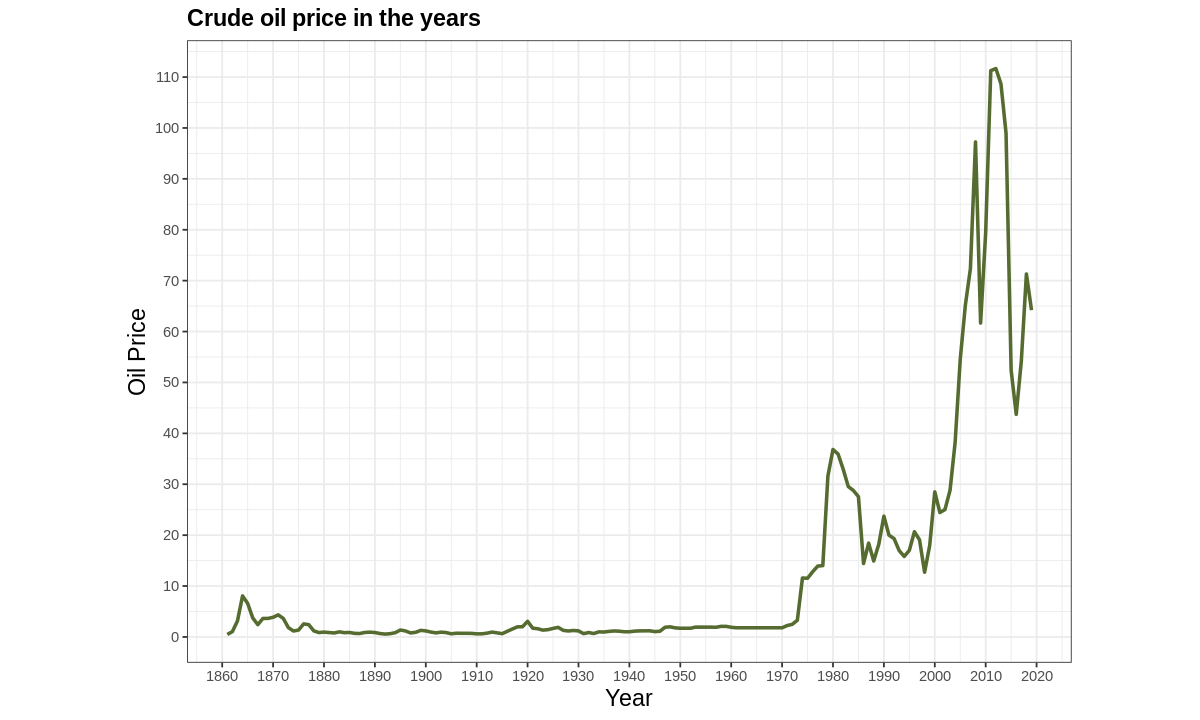

In [7]:
options(repr.plot.width=10, repr.plot.height=6)
p <- ggplot(oil_prices, aes(Year, OilPrice))
p + geom_line(linetype='solid', color='darkolivegreen', size = 1) + coord_fixed() + xlab('Year') + ylab('Oil Price') +
scale_x_continuous(breaks = scales::pretty_breaks(n = 15)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 15)) +
ggtitle('Crude oil price in the years') +
theme_bw() +
theme(plot.title=element_text(size=14, face = 'bold'),
axis.title.x=element_text(size=14),
axis.title.y=element_text(size=14))

### 2.3
which is the highest price in history? When did it occur?

In [8]:
max_p <- oil_prices[which.max(oil_prices$OilPrice),]
paste('Highest price for crude oil :', round(max_p$OilPrice, 2), 'in', max_p$Year)

[1] "Highest price for crude oil : 111.67 in 2012"

### 2.4
plot the derivative of the curve, simply evaluated with the finite difference formula

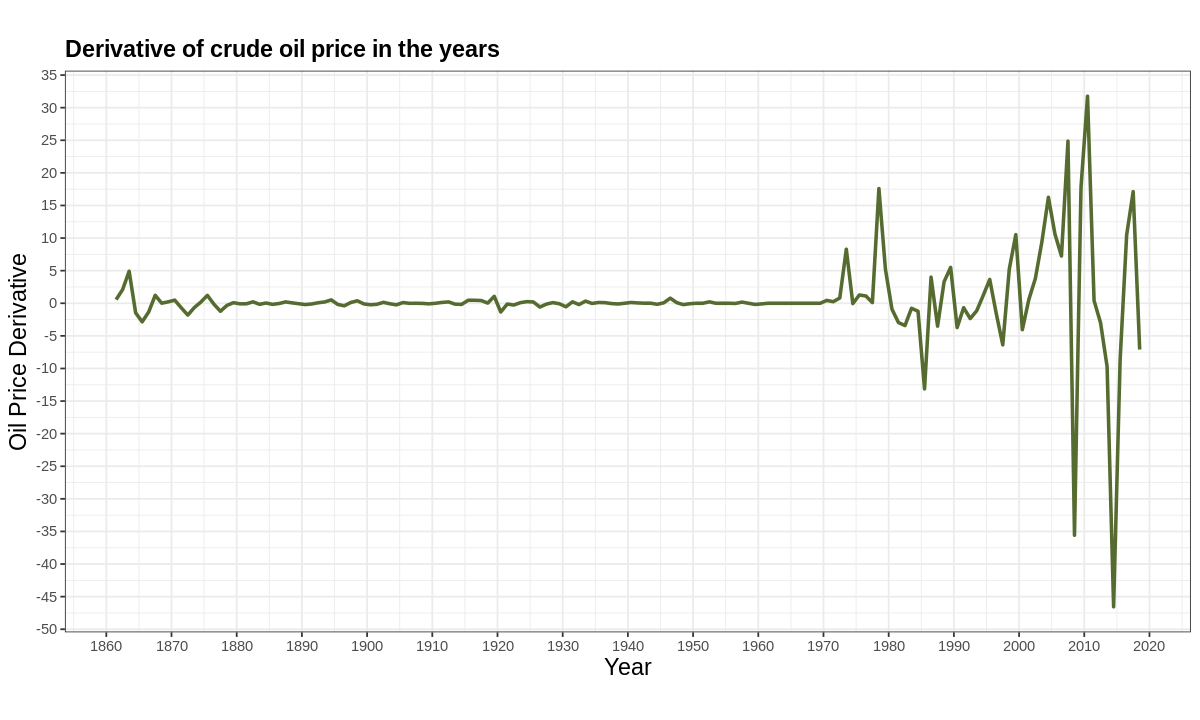

In [9]:
derivative <- diff(oil_prices$OilPrice)
years <- (tail(oil_prices$Year, -1) + head(oil_prices$Year, -1))/2 #middle points

options(repr.plot.width=10, repr.plot.height=6)
p <- ggplot()
p + geom_line(aes(years, derivative), linetype='solid', color='darkolivegreen', size = 1) + coord_fixed() +
xlab('Year') + ylab('Oil Price Derivative') + ggtitle('Derivative of crude oil price in the years') + 
theme_bw() +
scale_x_continuous(breaks = scales::pretty_breaks(n = 15)) +
scale_y_continuous(breaks = scales::pretty_breaks(n = 15)) +
theme(plot.title=element_text(size=14, face = 'bold'),
axis.title.x=element_text(size=14),
axis.title.y=element_text(size=14))


# Exercise 3

The following CSV file https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing contains data on the coal production (in TW · hour) for several countries in the World [3].
- Write R code that is able to read the file and import it in a tibble [4] structure
- count the number of countries available in the file and produce a barplot with the number of entries for each country

for the following items select only the years ≥ 1970:

-  selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions
- for the 5 top Countries, create a plot of production as a function of time
- generate a plot with the cumulative sum of the World’s coal production over the years

### 3.1
Write R code that is able to read the file and import it in a tibble structure

In [10]:
url_coal <- 'https://drive.google.com/u/0/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download'
coal_production <- read_csv(url_coal)
head(coal_production, 10)


#describe the object:
#str(coal_production)

Rows: 11528 Columns: 4── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (2): Year, Coal production (TWh)
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Entity,Code,Year,Coal production (TWh)
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0
Afghanistan,AFG,1909,0


### 3.2
count the number of countries available in the file and produce a barplot with the number of entries
for each country

[1] "Number of avaiable countries in the file: 200"

Entity,Frequency
Afghanistan,117
Africa,104
Albania,117
Algeria,65
American Samoa,37
Antigua and Barbuda,37
Argentina,65
Armenia,25
Aruba,31
Asia and Oceania,117


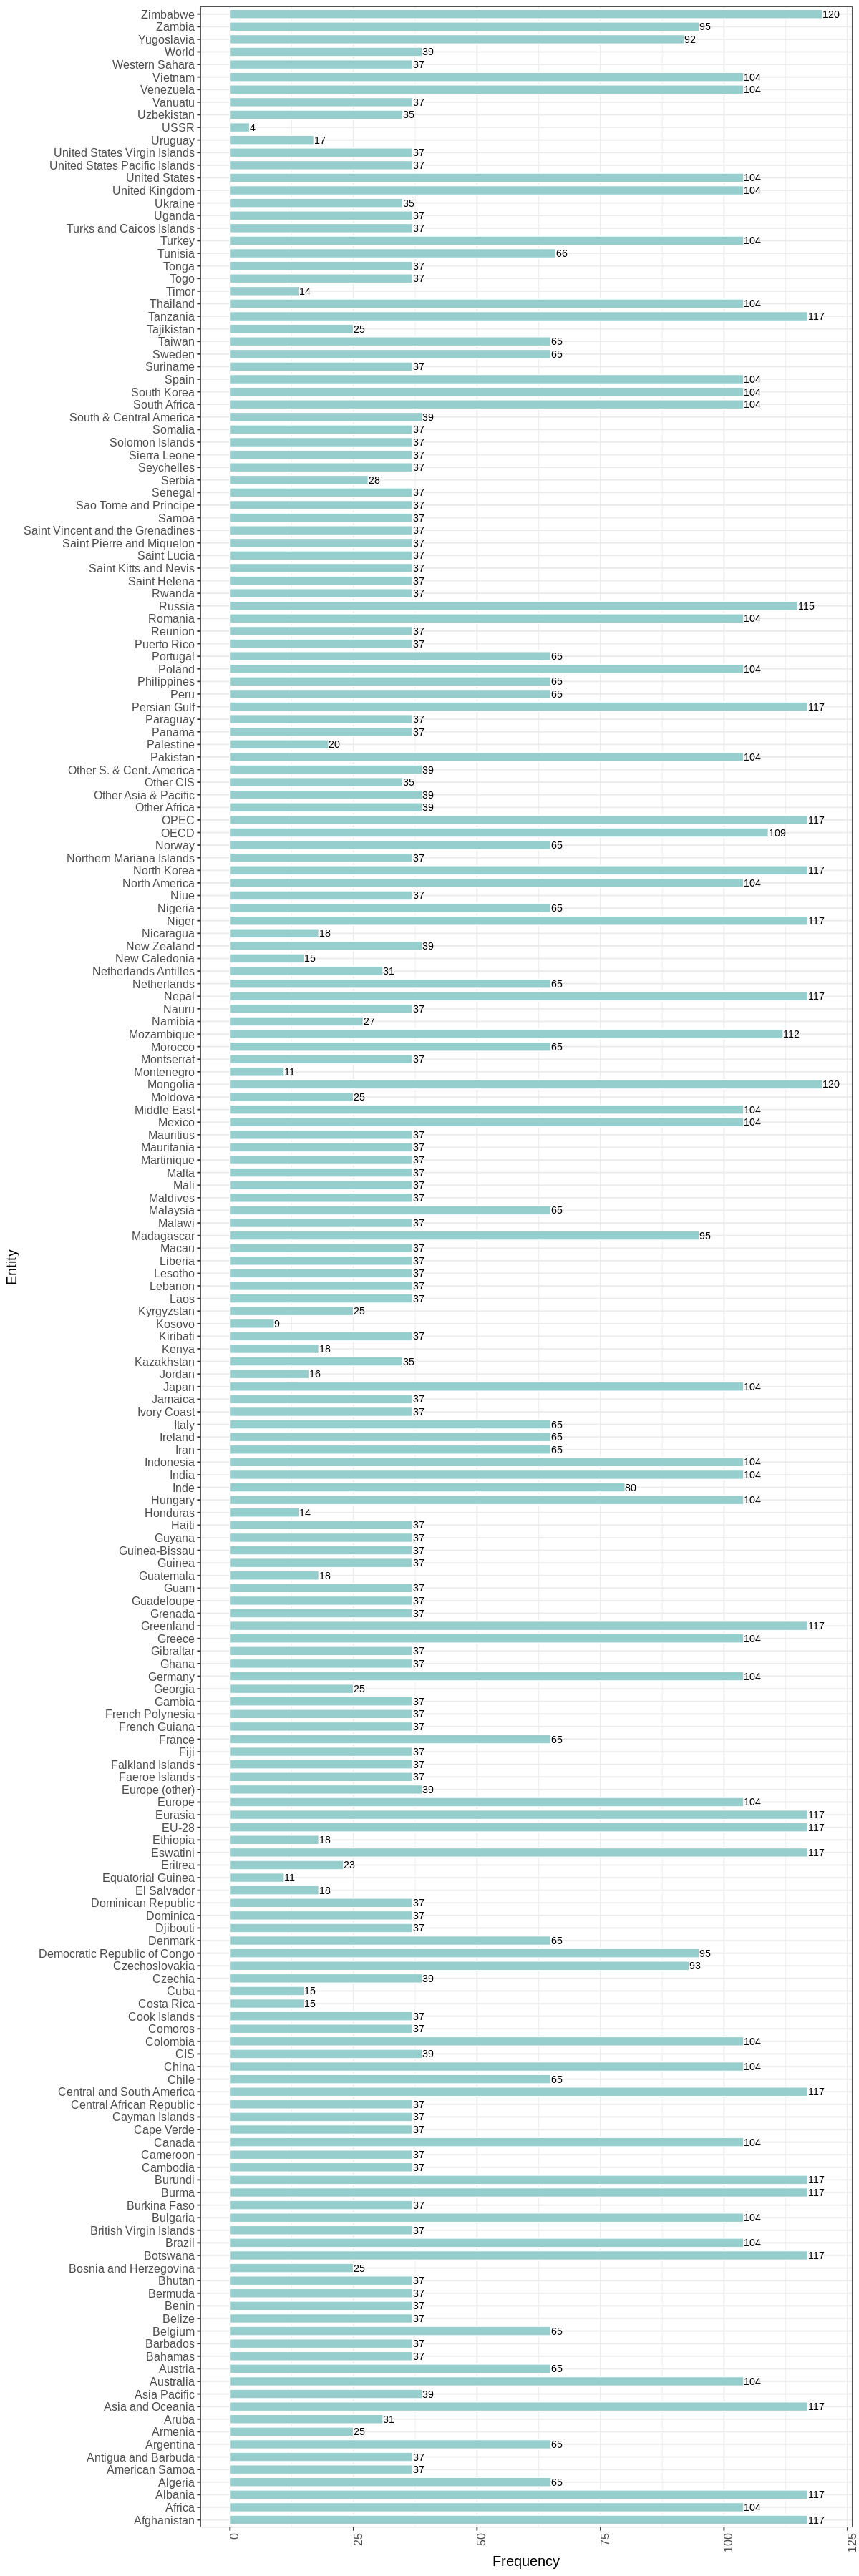

In [11]:
n_countries <- length(unique(coal_production$Entity))
paste('Number of avaiable countries in the file:', n_countries)

occurrences <- as.data.frame(table(coal_production$Entity)) # table(coal_production$Entity) tells how many times the countries appear in the "Entity" column of the coal_production tibble
colnames(occurrences) <- c('Entity', 'Frequency')
head(occurrences, 10)


# I could have used paste('Number of avaiable countries in the file:', length(occurrences$Entity))

options(repr.plot.width=10, repr.plot.height=30)
ggplot(occurrences, aes(x=Entity, y=Frequency)) + 
geom_bar(width = 0.75, stat='identity', colour='white', fill='paleturquoise3') +  #with stat='identity' the length of bars represent values in the data 
coord_flip()+
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, , vjust = 1), text = element_text(size=12)) + # rotate x labels, adjust justification
geom_text(aes(label=Frequency, size = 0.5), hjust=0, size= 3, color='black')

### 3.3
selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [12]:
# selet only the year after 1970
coal_1970 <- coal_production[coal_production$Year > 1970, ]
paste('Number of avaiable countries after 1970 in the file:', length(unique(coal_1970$Entity)))
head(coal_1970, 5)

colnames(coal_1970) <- c('Entity','Code','Year','Integrated_production')



#integrated production for each country
integrated_prod <- aggregate(coal_1970$Integrated_production, by = list(coal_1970$Entity), FUN = sum) #for each entity I sum all the values contained in "Coal production (TWh)"
colnames(integrated_prod) <- c('Country','Integrated_production')
integrated <- integrated_prod[order(integrated_prod$Integrated_production, decreasing=TRUE),]
head(integrated, 5)



# As can be seen, some entries do not correspond to countries: I remove them
to_remove <- c('World', 'Asia Pacific', 'Asia and Oceania', 'OECD', 'North America', 'Eurasia', 'Europe', 'EU-28', 'CIS', 'South & Central AMerica', 'USSR')
countries_1970 <- filter(integrated, !integrated$Country %in% to_remove)


#finally, I can find what are the top 5 Countries with highest coal productions
head(countries_1970, 5)

[1] "Number of avaiable countries after 1970 in the file: 179"

Entity,Code,Year,Coal production (TWh)
Afghanistan,AFG,1971,1.099
Afghanistan,AFG,1972,0.578
Afghanistan,AFG,1973,0.952
Afghanistan,AFG,1974,0.936
Afghanistan,AFG,1975,1.221


,Country,Integrated_production
176,World,1260113.2
9,Asia Pacific,690240.5
8,Asia and Oceania,682343.9
32,China,459564.6
120,OECD,428754.2


Country,Integrated_production
China,459564.65
United States,226068.84
Russia,98251.65
Australia,83077.07
India,77043.45


### 3.4
for the 5 top Countries, create a plot of production as a function of time

Entity,Code,Year,Integrated_production
Australia,AUS,1981,788.572
Australia,AUS,1982,804.955
Australia,AUS,1983,838.741
Australia,AUS,1984,880.918
Australia,AUS,1985,1074.347
Australia,AUS,1986,1142.860


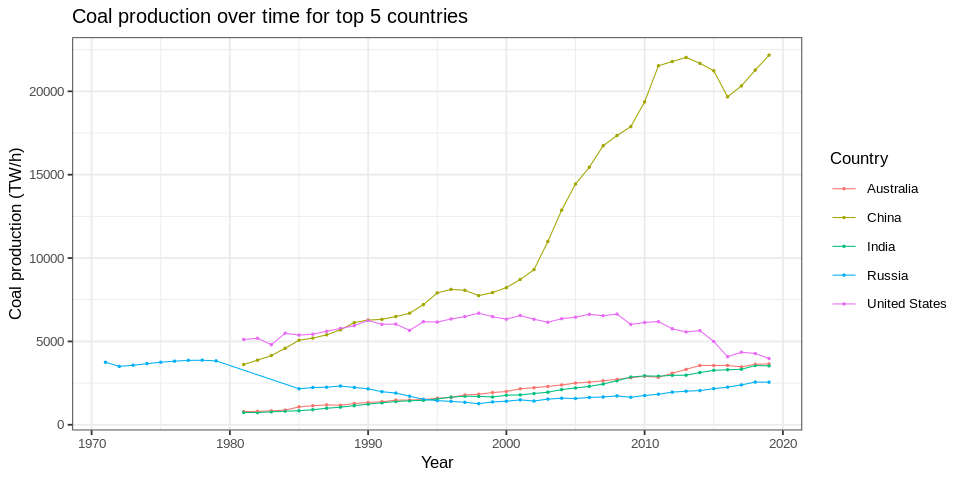

In [13]:
# plot production over time for top 5 countries
countries_5 <- countries_1970$Country[1:5]
coal_5 <- coal_1970[coal_1970$Entity %in% countries_5, ]
head(coal_5)


options(repr.plot.width = 8, repr.plot.height = 4)                                     
p <- ggplot(data = coal_5, aes(x = Year, y = Integrated_production)) +   
     theme_bw() + geom_point(aes(color = Entity), size = 0.3 ) +
geom_line(aes(color = Entity), size = 0.3 ) + theme(text = element_text(size= 10)) +
labs(title='Coal production over time for top 5 countries', x='Year', y='Coal production (TW/h)', col= 'Country')

p

### 3.5
generate a plot with the cumulative sum of the World’s coal production over the years

Warning message:
“Use of `world_production$Year` is discouraged. Use `Year` instead.”Warning message:
“Use of `world_production$Year` is discouraged. Use `Year` instead.”

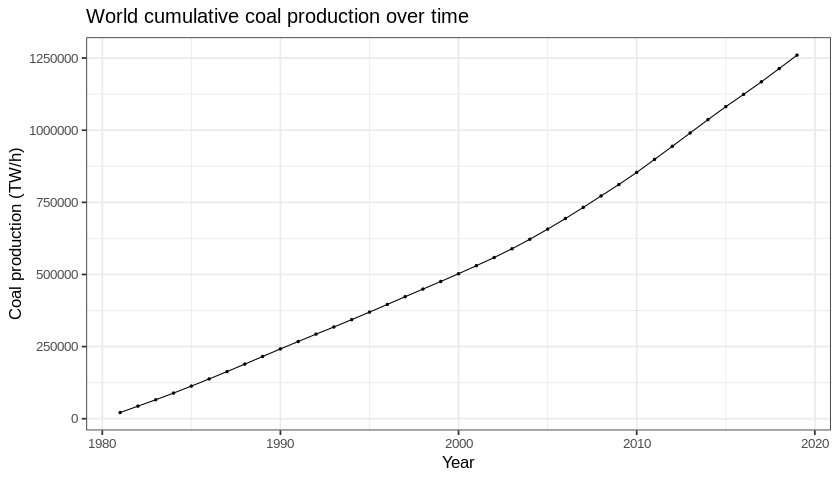

In [14]:
world_production <- coal_1970[coal_1970$Entity == 'World',] # select the information for whole world
world_cumsum <- cumsum(world_production$Integrated_production)


# plot cumulative sum of world's coal produciton over the years
options(repr.plot.width = 7, repr.plot.height = 4)                                     
p <- ggplot(data = world_production, aes(x = world_production$Year, y = world_cumsum)) +   
     theme_bw() + geom_point(size = 0.3 ) + geom_line( size = 0.3 ) + theme(text = element_text(size= 10)) +
labs(title = 'World cumulative coal production over time', x='Year', y='Coal production (TW/h)', col= 'Country')

p


# Exercise 4

Data on Covid-19 vaccine can be found on [5].
- The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv) contains a summary on the vaccination data grouped by Vaccine type and Country.
    - filter() the original tibble by selecting the following countries: Italy
    - plot the number of vaccines given as a function of time for the different vaccine manufacturer
    - from the same tibble plot the total number of vaccines shot per day in Italy
    - do the same exercise for the following countries: Germany and United States of America
    
- The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, . . .) and international aggregates (World, continents, European Union ldots). They can be identified by their iso code that starts with OWID
    - selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date
    - study the data structure and produce few relevant plots of your taste

### 4.1

In [15]:
url <- 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
vax <- read_csv(url) #read_csv function which imports data as tibble
paste('is the data imported in a tibble? : ', is_tibble(vax))
head(vax, 10)

Rows: 42201 Columns: 4── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): location, vaccine
dbl  (1): total_vaccinations
date (1): date
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

[1] "is the data imported in a tibble? :  TRUE"

location,date,vaccine,total_vaccinations
Argentina,2020-12-29,Moderna,2
Argentina,2020-12-29,Oxford/AstraZeneca,7
Argentina,2020-12-29,Pfizer/BioNTech,1
Argentina,2020-12-29,Sinopharm/Beijing,3
Argentina,2020-12-29,Sputnik V,20487
Argentina,2020-12-30,Sputnik V,40589
Argentina,2020-12-31,Sputnik V,43395
Argentina,2021-01-01,Oxford/AstraZeneca,9
Argentina,2021-01-01,Sputnik V,43520
Argentina,2021-01-02,Oxford/AstraZeneca,10


### 4.1.1
filter() the original tibble by selecting the following countries: Italy

### 4.1.2
plot the number of vaccines given as a function of time for the different vaccine manufacturer

### 4.1.3
from the same tibble plot the total number of vaccines shot per day in Italy

location,date,vaccine,total_vaccinations
Italy,2020-12-27,Moderna,2
Italy,2020-12-27,Pfizer/BioNTech,7348
Italy,2020-12-28,Moderna,6
Italy,2020-12-28,Pfizer/BioNTech,8849
Italy,2020-12-29,Moderna,11


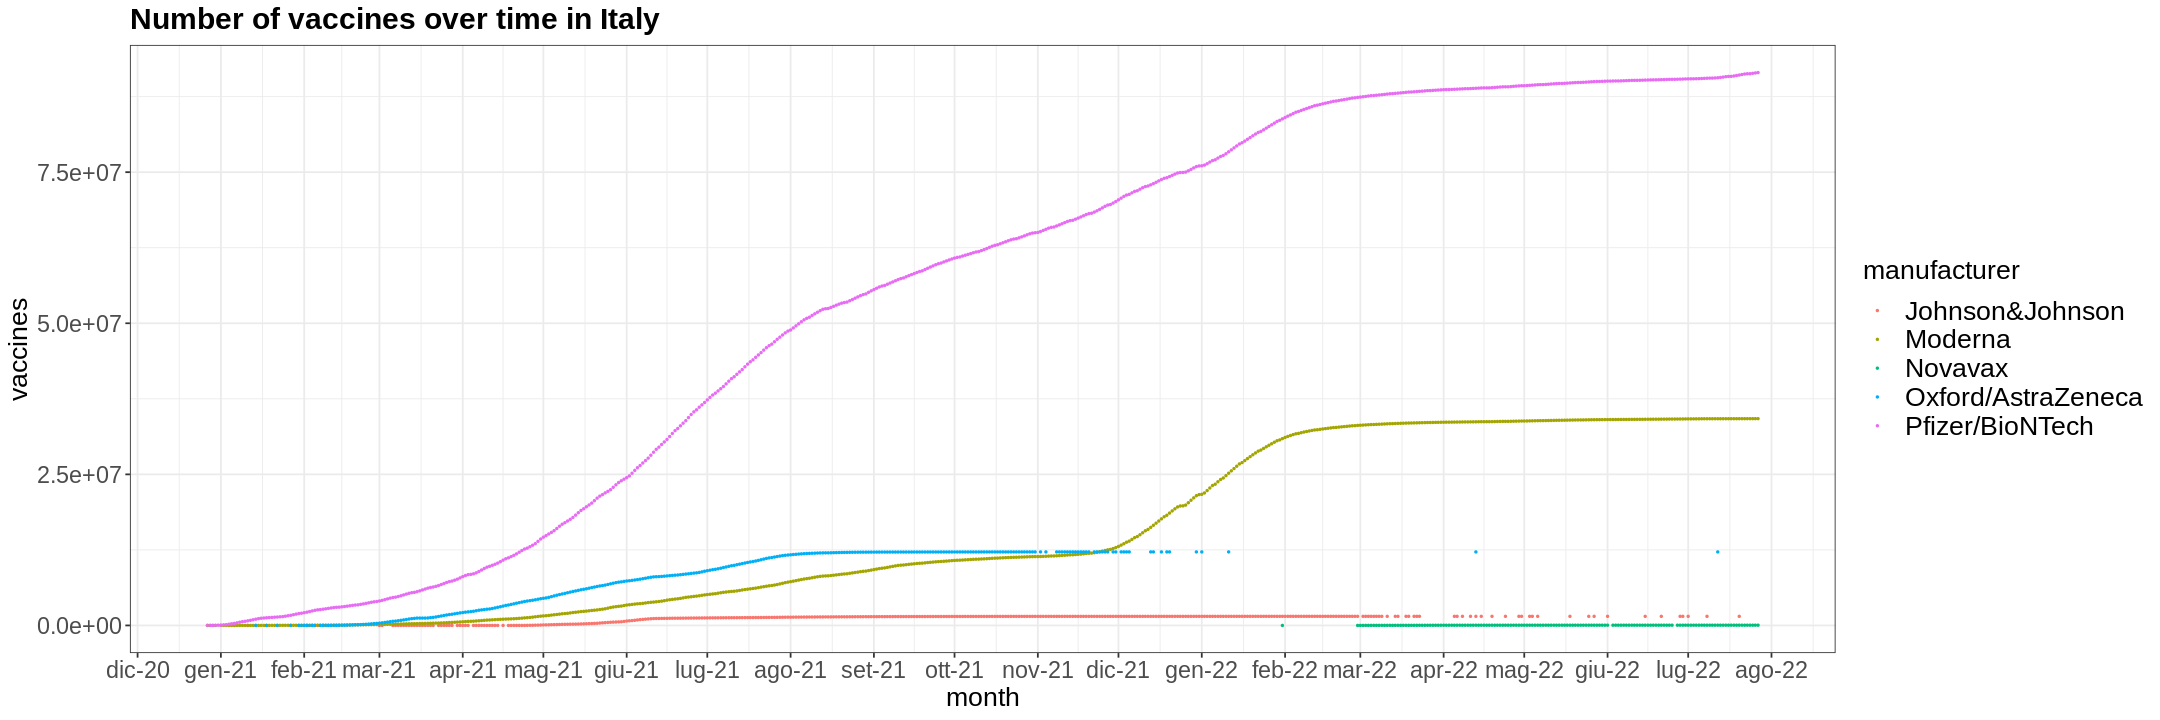

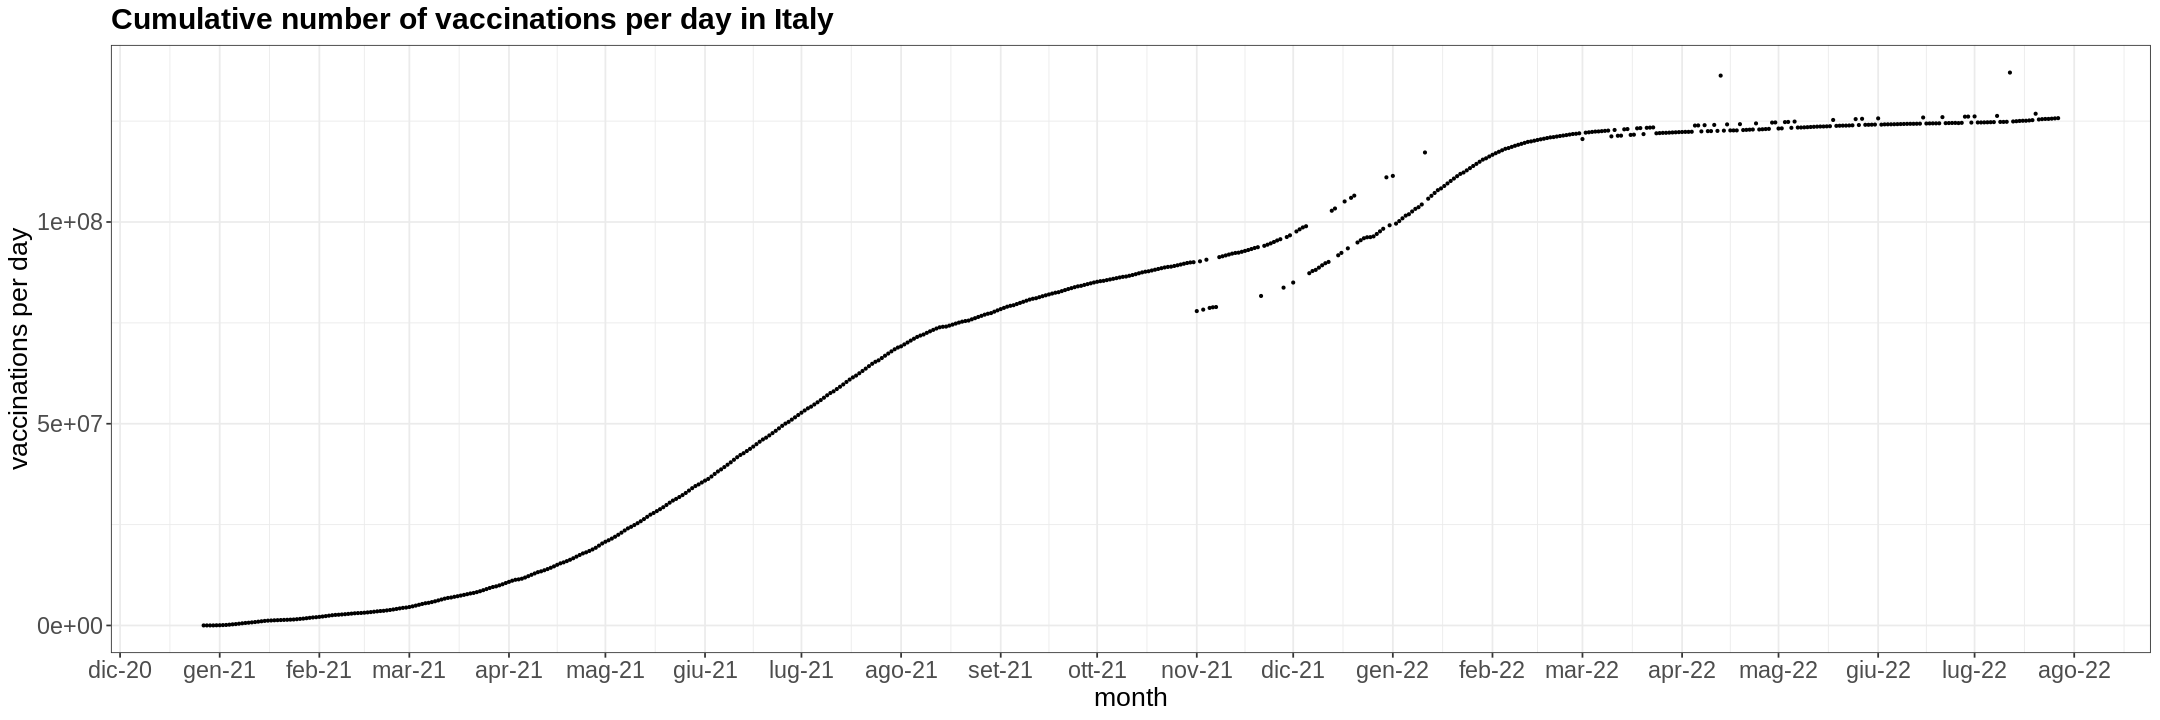

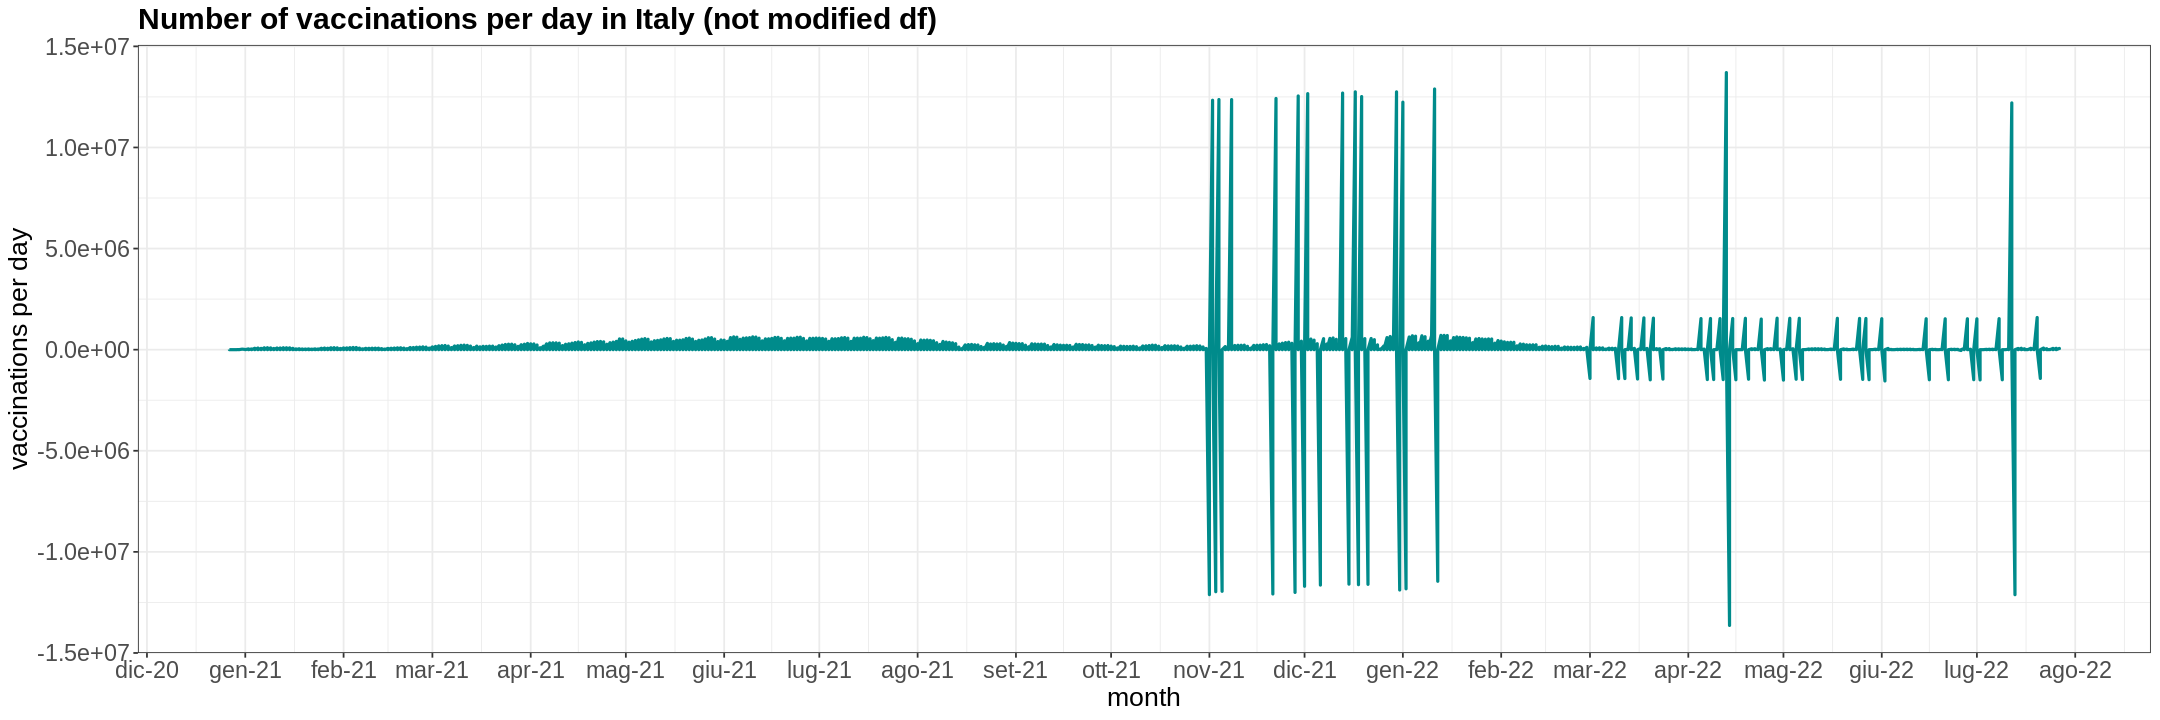

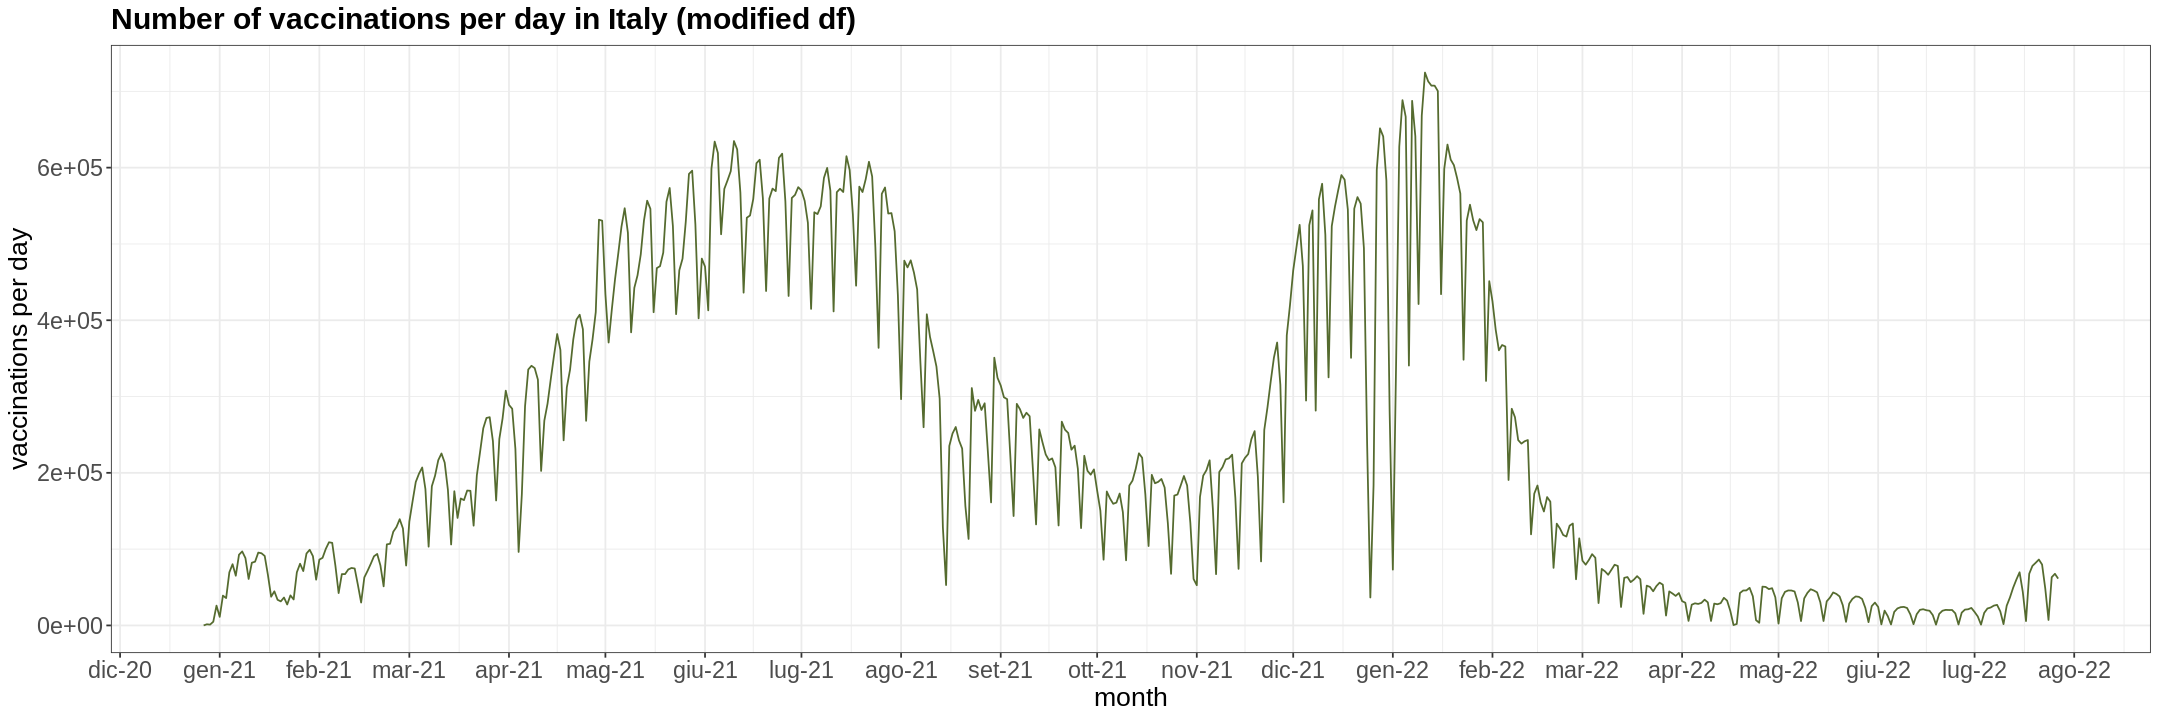

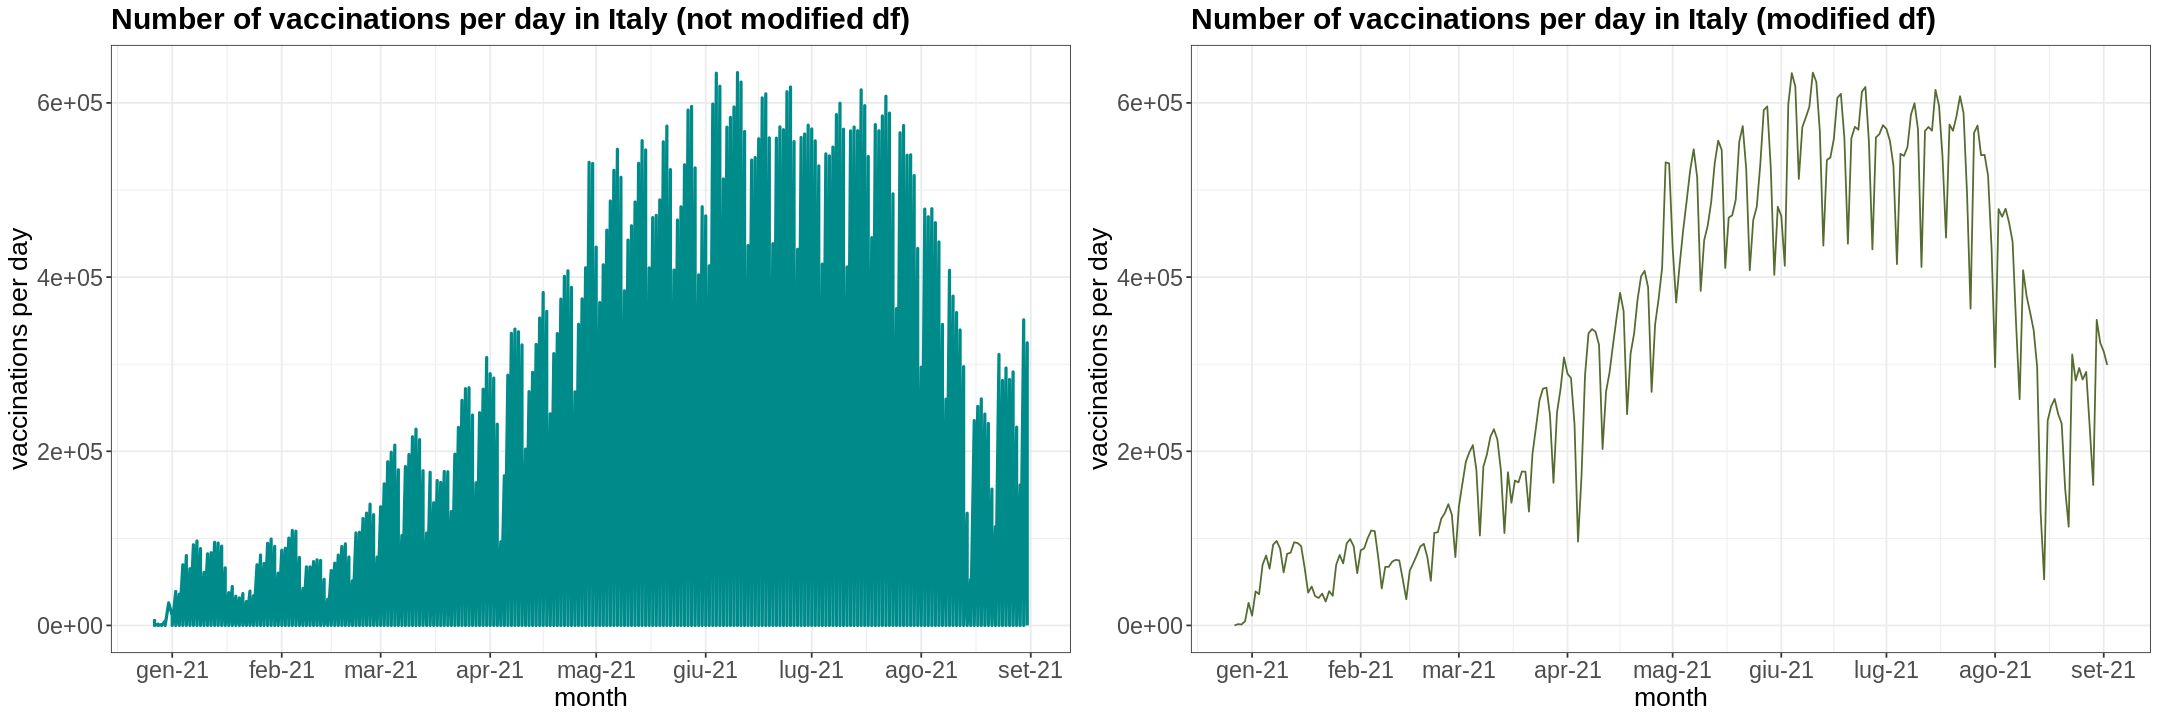

In [16]:
# filter() the original tibble by selecting the following countries: Italy
it_vax <- filter(vax, vax$location == 'Italy')
head(it_vax, 5)


# plot the number of vaccines given as a function of time for the different vaccine manufacturer
options(repr.plot.width=18, repr.plot.height= 6)
pp <- ggplot(it_vax, aes(as.Date(date), total_vaccinations, group = vaccine, colour=vaccine)) +
geom_point(aes(col = vaccine), size = 0.3) +
labs(title = 'Number of vaccines over time in Italy', x='month', y='vaccines', col='manufacturer') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16),
legend.title = element_text(size = 16),
legend.text = element_text(size = 16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

pp


#from the same tibble plot the total number of vaccines shot per day in Italy
totvax <- aggregate(it_vax$total_vaccinations, by = list(date = as.Date(it_vax$date)), sum)

options(repr.plot.width=18, repr.plot.height= 6)
pr <- ggplot(totvax, aes(x = as.Date(date), y = x)) +
geom_point(size = 0.5) +
labs(title = 'Cumulative number of vaccinations per day in Italy', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

pr


#calculate the number of vaccines shot per day in Italy, modifying the data since for some days the data are missing
unique_dates <- unique(it_vax$date)
unique_vaccines <- unique(it_vax$vaccine)

vax_per_day <- rep(0, length(unique_dates))

for (i in 1:length(unique_dates)){
    d <- unique_dates[i]
    for (v in unique_vaccines){
        today_vaccines <- filter(it_vax, date == d & vaccine == v)
        yesterday_vaccines <- filter(it_vax, date == (d - 1) & vaccine == v)
        if (dim(today_vaccines)[1] != 0 ){
            if (dim(yesterday_vaccines)[1] != 0 ){
                vax_per_day[i] <- vax_per_day[i] + today_vaccines$total_vaccinations - yesterday_vaccines$total_vaccinations
            }
        }
    }
}

#calculate the number of vaccines shot per day in Italy, without modifying the data
it_vax$total_vax <- ave(it_vax$total_vaccinations, it_vax$date, FUN = sum)
it_vax <- mutate(it_vax, vacc_per_day = c(it_vax$total_vax[1],diff(it_vax$total_vax)))


#plot vaccines per day
p1 <- ggplot(it_vax, aes(as.Date(date), vacc_per_day)) +
geom_line(size = 0.9, col = 'darkcyan') +
labs(title = 'Number of vaccinations per day in Italy (not modified df)', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')
p1


options(repr.plot.width=18, repr.plot.height= 6)
p2 <- ggplot() + geom_line(aes(x = unique_dates, y = vax_per_day), size = 0.5, , col = 'darkolivegreen') +
labs(title = 'Number of vaccinations per day in Italy (modified df)', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

p2

#plot vaccinations per day up to september 2021 to confront the two methods
partial_it_vax <- it_vax[it_vax$date < '2021-09-01 ', ]

options(repr.plot.width=18, repr.plot.height= 6)
partial_not_mod <- ggplot(partial_it_vax, aes(as.Date(date), vacc_per_day)) +
geom_line(size = 0.9, col = 'darkcyan') +
labs(title = 'Number of vaccinations per day in Italy (not modified df)', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')


options(repr.plot.width=18, repr.plot.height= 6)
partial_mod <- ggplot() + geom_line(aes(x = unique_dates[1:250], y = vax_per_day[1:250]), size = 0.5, col = 'darkolivegreen') +
labs(title = 'Number of vaccinations per day in Italy (modified df)', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

grid.arrange(partial_not_mod, partial_mod, nrow = 1, widths = c(1, 1))

It is observed that in the second graph, which represents the cumulative number of vaccines, we have that in some cases (from November 2021) the function goes down, instead of going up as we would expect since the function is cumulative.
This is due to the fact that, for a few days in January 2022, the dataset does not include AstraZeneca vaccines. This is even more evident in the last graph in which the vaccines per day are reported, in which there are sudden peaks: this is simply because in those days the number of vaccines carried out up to that point by AstraZeneca is not reported, and therefore there is a big difference between that day and the previous or next.

I tried to fix the data, considering the variation in number of vaccines per day only when the difference is non negative, and otherwise considering the number of vaccines constant.
It can be observed that the number of vaccines per day calculated using the original data and the modified data is different when there is some missing data (3rd and 4th plot), but it is the same when the data is non missing (5th and 6th plot, in which the number is calculated only up to September 2021).

### 4.1.4
do the same exercise for the following countries: Germany and United States of America

location,date,vaccine,total_vaccinations
Germany,2020-12-27,Johnson&Johnson,0
Germany,2020-12-27,Moderna,8
Germany,2020-12-27,Novavax,0
Germany,2020-12-27,Oxford/AstraZeneca,1
Germany,2020-12-27,Pfizer/BioNTech,24412


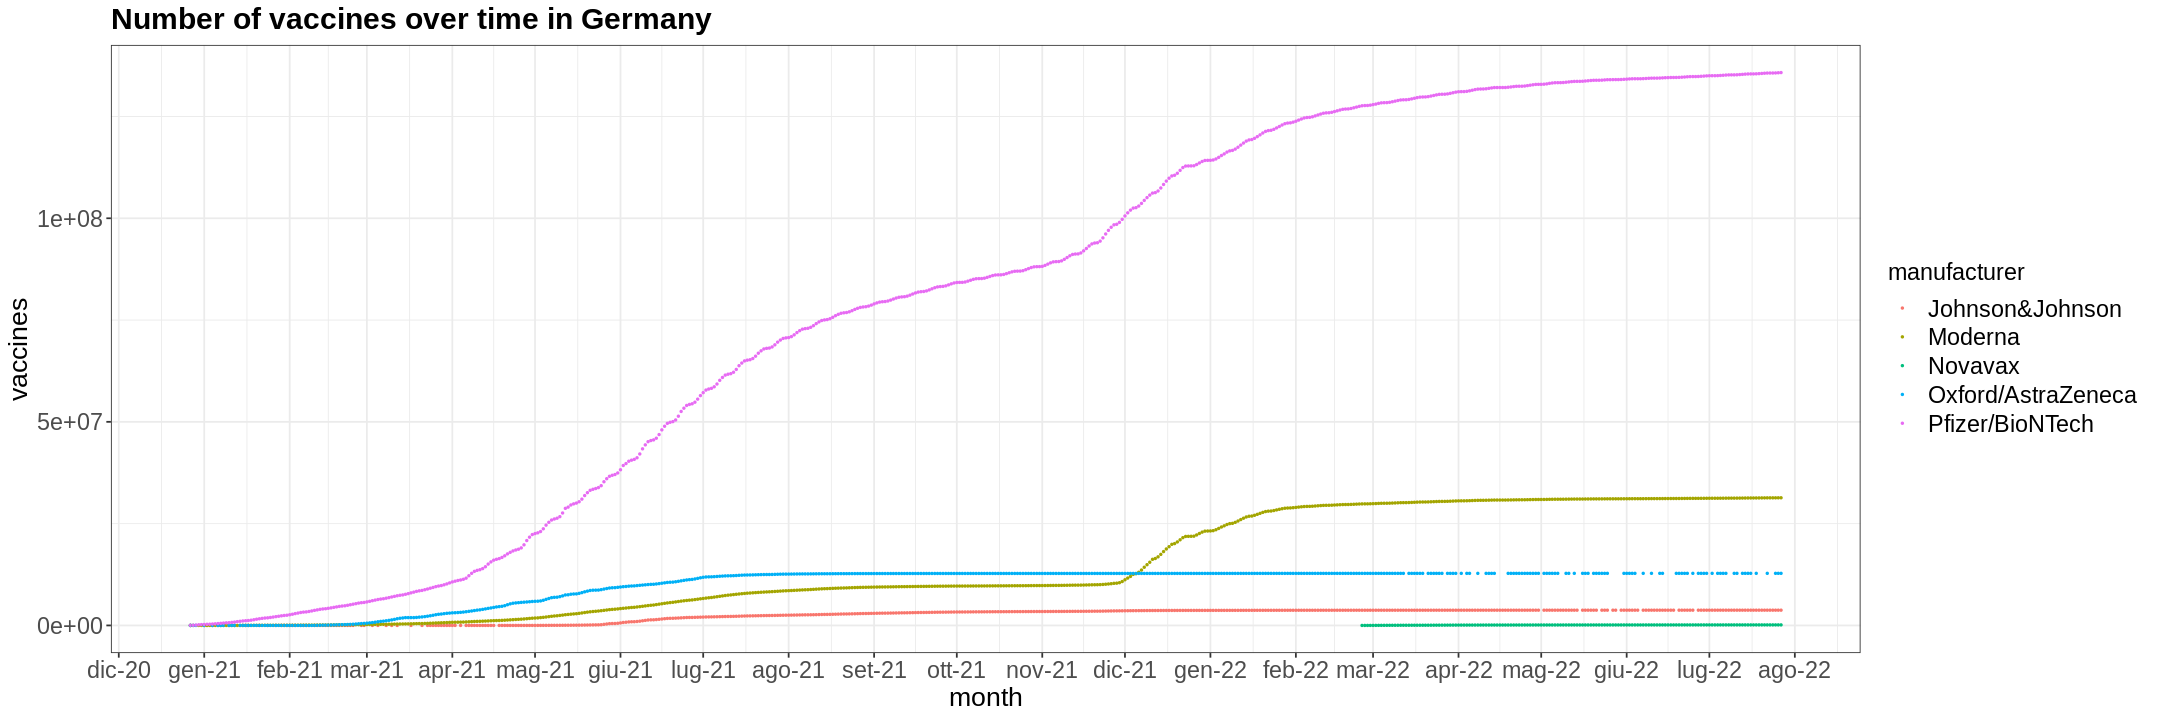

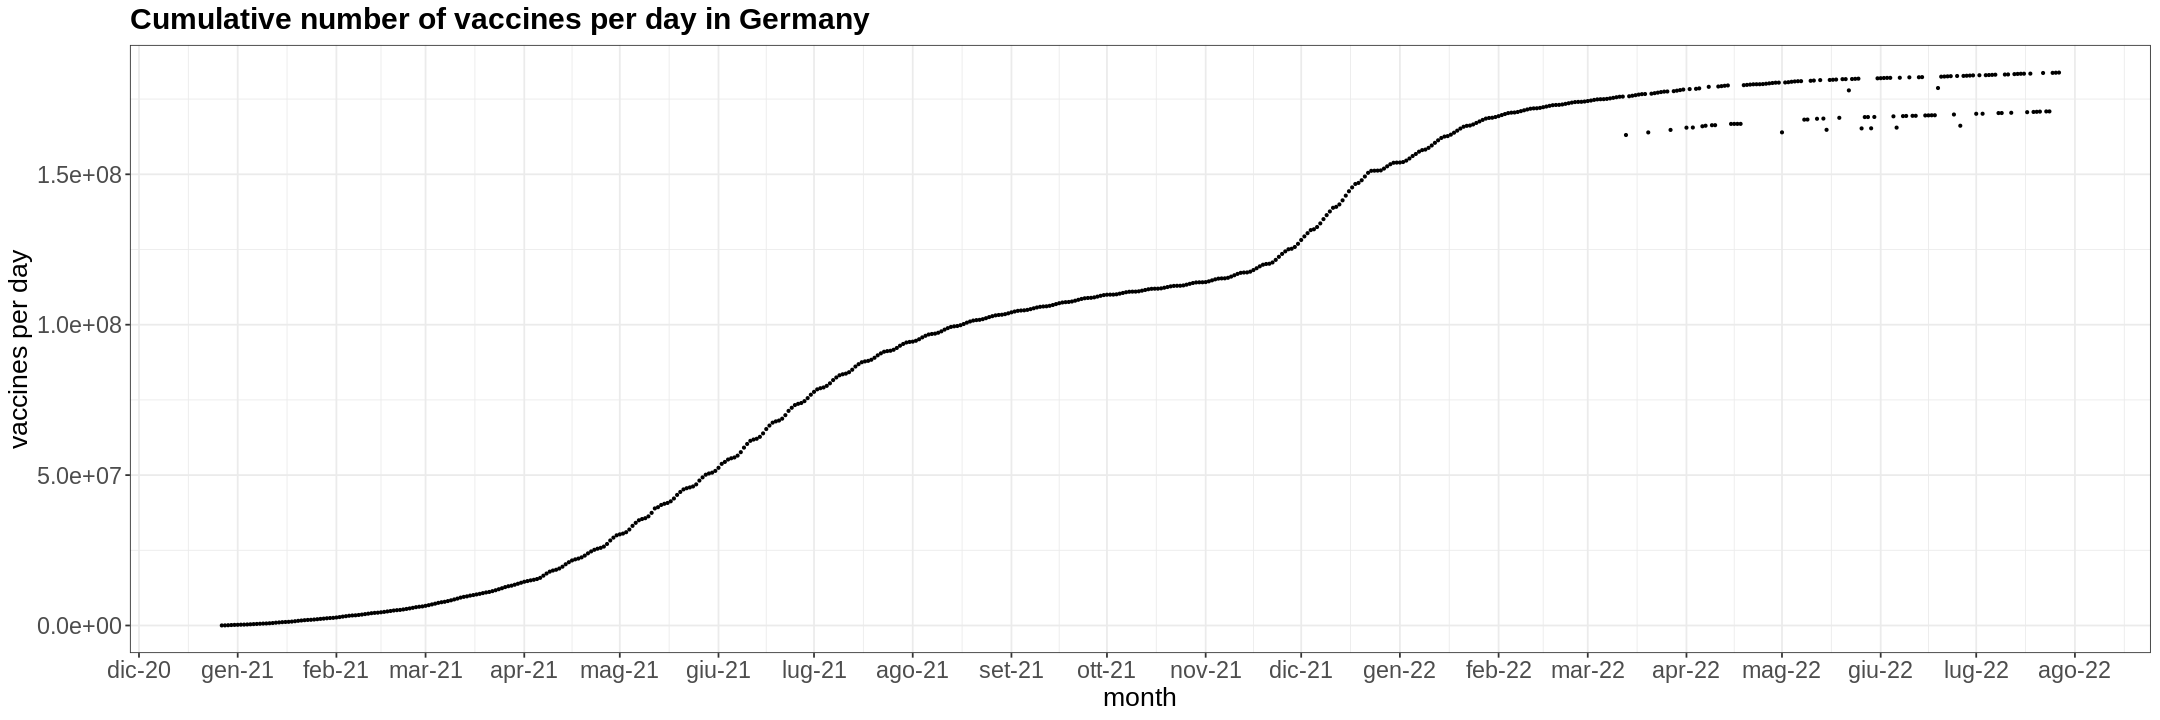

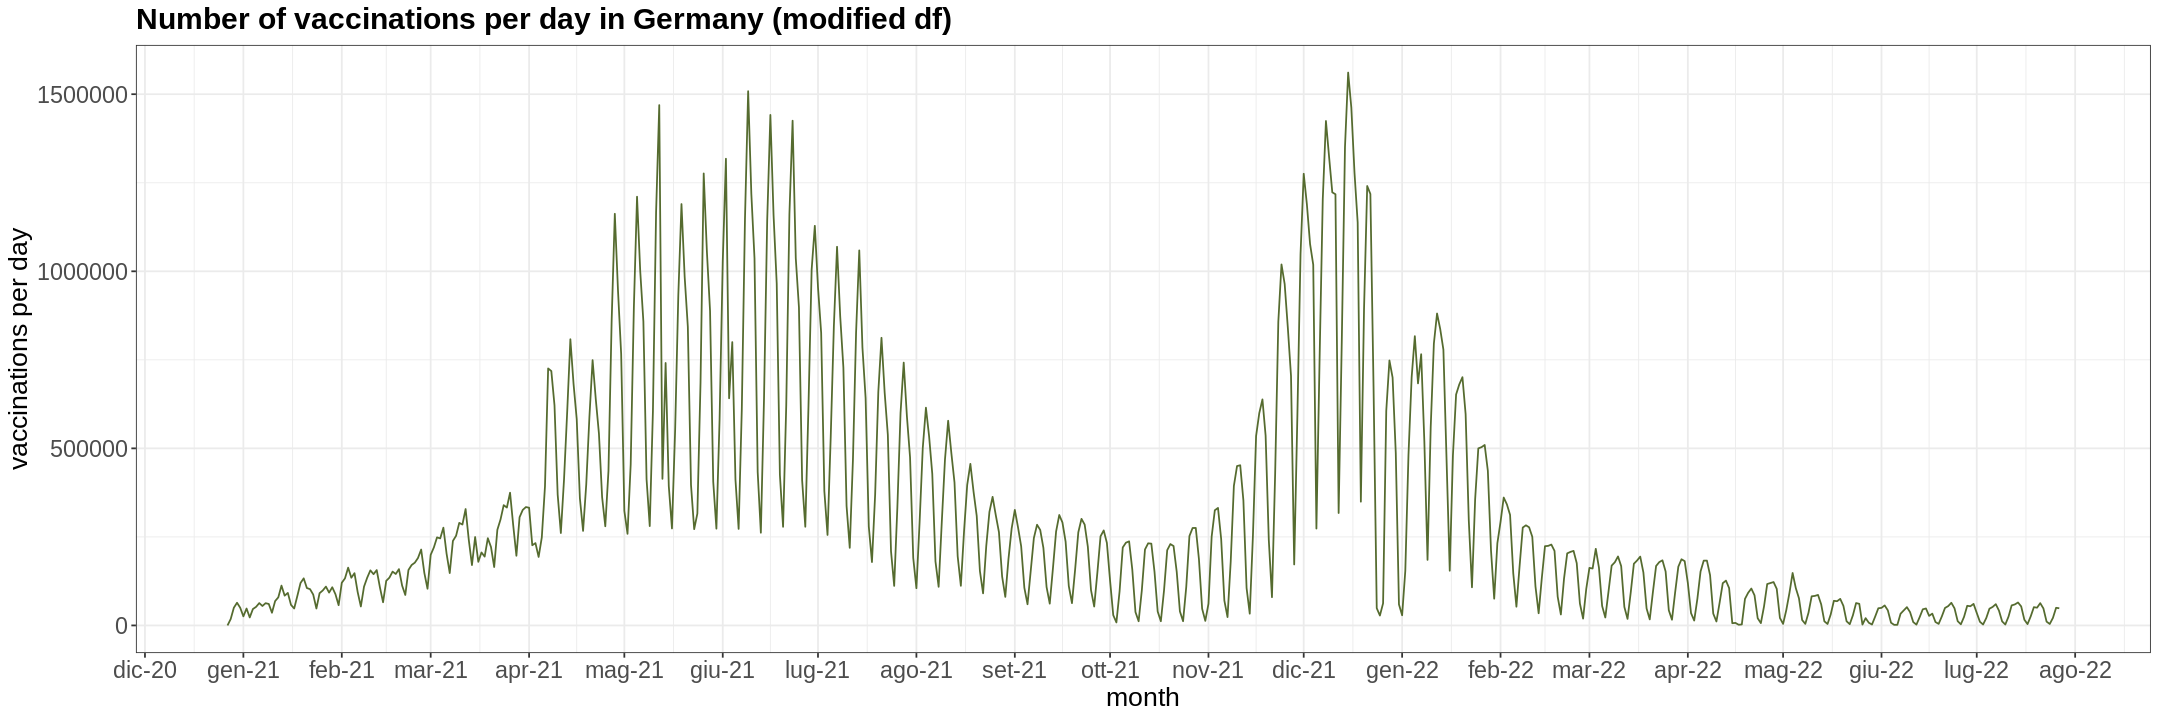

In [17]:
# do the same exercise for the following countries: Germany and United States of America

# filter() the original tibble by selecting the following countries: Germany
ger_vax <- filter(vax, vax$location =='Germany')
head(ger_vax, 5)



# plot the number of vaccines given as a function of time for the different vaccine manufacturer
options(repr.plot.width=18, repr.plot.height= 6)
pp <- ggplot(ger_vax, aes(as.Date(date), total_vaccinations, group = vaccine, colour=vaccine)) +
geom_point(aes(col = vaccine), size = 0.3) +
labs(title = 'Number of vaccines over time in Germany', x='month', y='vaccines', col='manufacturer') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16),
legend.title = element_text(size = 14),
legend.text = element_text(size = 14),
) + scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

pp


#from the same tibble plot the total number of vaccines shot per day in Germany
totvax <- aggregate(ger_vax$total_vaccinations, by = list(date = as.Date(ger_vax$date)), sum)

options(repr.plot.width=18, repr.plot.height= 6)
pr <- ggplot(totvax, aes(x = as.Date(date), y = x)) +
geom_point(size = 0.5) +
labs(title = 'Cumulative number of vaccines per day in Germany', x='month', y='vaccines per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16),
legend.title = element_text(size = 14),
legend.text = element_text(size = 14)
) + scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

pr

#calculate and plot number of vaccinations per day in Germany
unique_dates <- unique(ger_vax$date)
unique_vaccines <- unique(ger_vax$vaccine)
vax_per_day <- rep(0, length(unique_dates))

for (i in 1:length(unique_dates)){
    d <- unique_dates[i]
    for (v in unique_vaccines){
        today_vaccines <- filter(ger_vax, date == d & vaccine == v)
        yesterday_vaccines <- filter(ger_vax, date == (d - 1) & vaccine == v)
        if (dim(today_vaccines)[1] != 0 ){
            if (dim(yesterday_vaccines)[1] != 0 ){
                vax_per_day[i] <- vax_per_day[i] + today_vaccines$total_vaccinations - yesterday_vaccines$total_vaccinations
            }
        }
    }
}

options(repr.plot.width=18, repr.plot.height= 6)
p2 <- ggplot() + geom_line(aes(x = unique_dates, y = vax_per_day), size = 0.5, , col = 'darkolivegreen') +
labs(title = 'Number of vaccinations per day in Germany (modified df)', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

p2

location,date,vaccine,total_vaccinations
United States,2021-01-12,Moderna,3835859
United States,2021-01-12,Pfizer/BioNTech,5488697
United States,2021-01-13,Moderna,4249795
United States,2021-01-13,Pfizer/BioNTech,6025872
United States,2021-01-15,Moderna,5122662


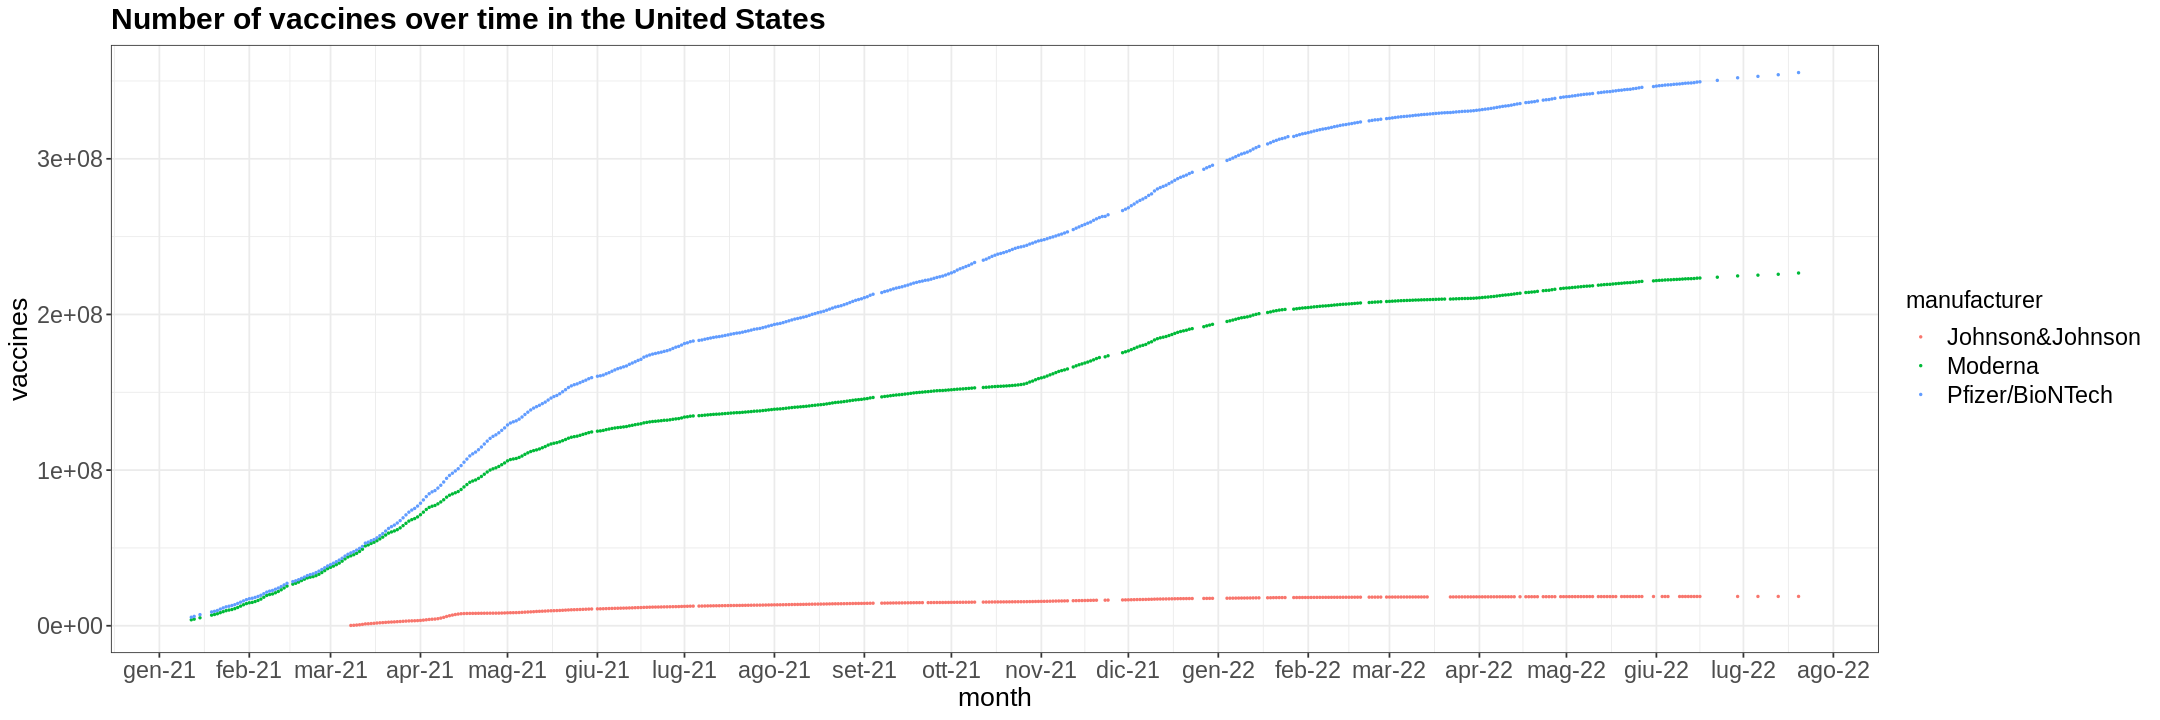

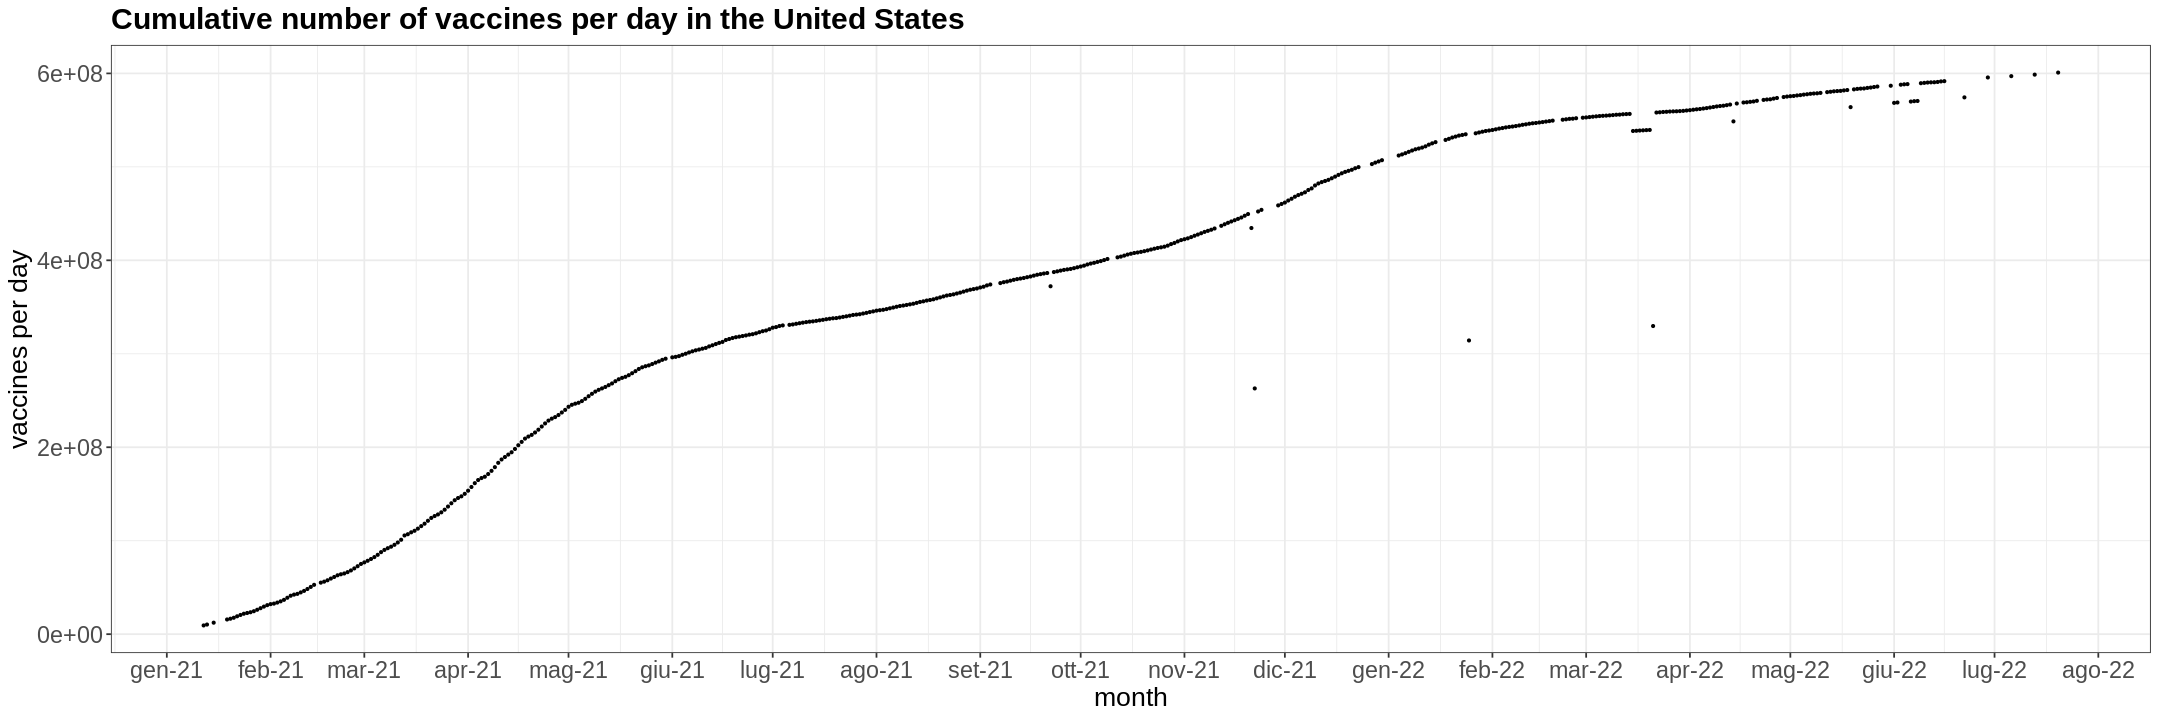

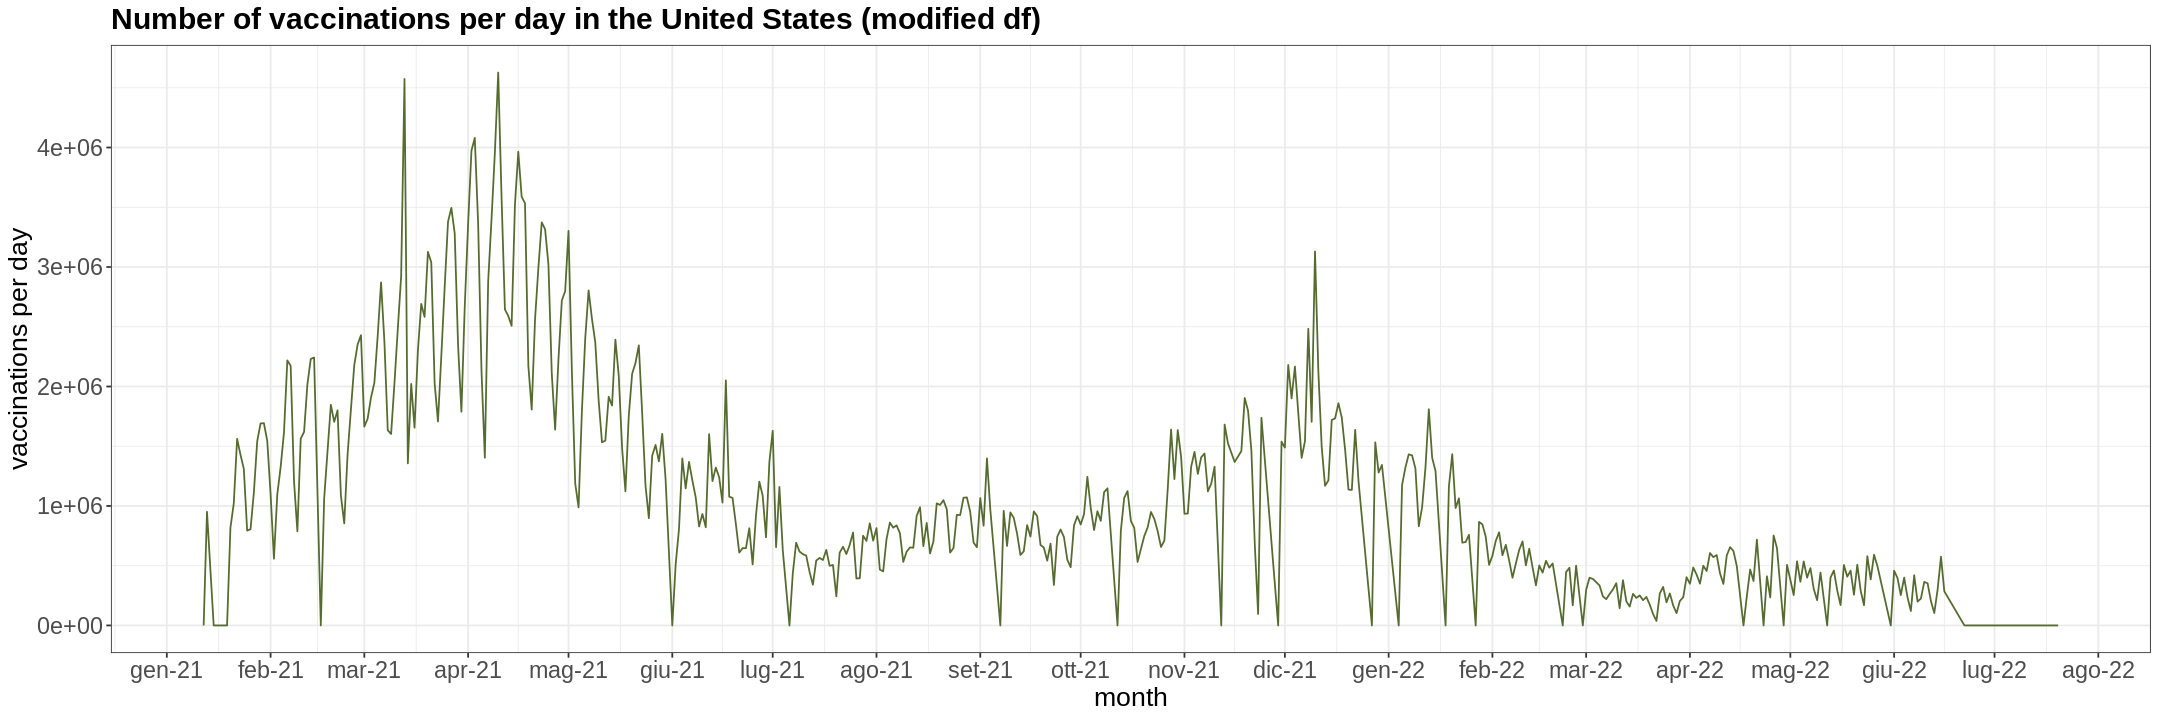

In [18]:
# filter() the original tibble by selecting the following countries: United States
usa_vax <- filter(vax, vax$location =='United States')
head(usa_vax, 5)



# plot the number of vaccines given as a function of time for the different vaccine manufacturer
options(repr.plot.width=18, repr.plot.height= 6)
pp <- ggplot(usa_vax, aes(as.Date(date), total_vaccinations, group = vaccine, colour=vaccine)) +
geom_point(aes(col = vaccine), size = 0.3) +
labs(title = 'Number of vaccines over time in the United States', x='month', y='vaccines', col='manufacturer') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16),
legend.title = element_text(size = 14),
legend.text = element_text(size = 14),
) + scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

pp


#from the same tibble plot the total number of vaccines shot per day in the United States
totvax <- aggregate(usa_vax$total_vaccinations, by = list(date = as.Date(usa_vax$date)), sum)

options(repr.plot.width=18, repr.plot.height= 6)
pr <- ggplot(totvax, aes(x = as.Date(date), y = x)) +
geom_point(size = 0.5) +
labs(title = 'Cumulative number of vaccines per day in the United States', x='month', y='vaccines per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16),
legend.title = element_text(size = 14),
legend.text = element_text(size = 14)
) + scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

pr

#calculate and plot number of vaccinations per day in the Unites States
unique_dates <- unique(usa_vax$date)
unique_vaccines <- unique(usa_vax$vaccine)
vax_per_day <- rep(0, length(unique_dates))

for (i in 1:length(unique_dates)){
    d <- unique_dates[i]
    for (v in unique_vaccines){
        today_vaccines <- filter(usa_vax, date == d & vaccine == v)
        yesterday_vaccines <- filter(usa_vax, date == (d - 1) & vaccine == v)
        if (dim(today_vaccines)[1] != 0 ){
            if (dim(yesterday_vaccines)[1] != 0 ){
                vax_per_day[i] <- vax_per_day[i] + today_vaccines$total_vaccinations - yesterday_vaccines$total_vaccinations
            }
        }
    }
}

options(repr.plot.width=18, repr.plot.height= 6)
p2 <- ggplot() + geom_line(aes(x = unique_dates, y = vax_per_day), size = 0.5, , col = 'darkolivegreen') +
labs(title = 'Number of vaccinations per day in the United States (modified df)', x='month', y='vaccinations per day') +
theme_bw() +
theme(plot.title=element_text(size=18, face = 'bold'), 
axis.text.x=element_text(size=14), 
axis.text.y=element_text(size=14),
axis.title.x=element_text(size=16),
axis.title.y=element_text(size=16)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')

p2

Again, the result is not reasonable since the difference is negative, this is due to missing data by Jonson&Johnson.

### 4.2

In [19]:
url_vax <- 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vaccines <- read_csv(url_vax)
head(vaccines, 10)
vaccines <- vaccines[complete.cases(vaccines), ]

Rows: 117049 Columns: 16── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): location, iso_code
dbl  (13): total_vaccinations, people_vaccinated, people_fully_vaccinated, t...
date  (1): date
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0.00,0.00,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-28,8200,8200,NA,NA,NA,1367,0.02,0.02,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-03-01,NA,NA,NA,NA,NA,1580,NA,NA,NA,NA,39,1580,0.004
Afghanistan,AFG,2021-03-02,NA,NA,NA,NA,NA,1794,NA,NA,NA,NA,45,1794,0.004
Afghanistan,AFG,2021-03-03,NA,NA,NA,NA,NA,2008,NA,NA,NA,NA,50,2008,0.005


### 4.2.1
selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Europe,OWID_EUR,2021-01-01,511026,509794,116,1,120406,154909,0.07,0.07,0,0,207,148545,0.020
Europe,OWID_EUR,2021-01-02,1361422,1360186,134,1,188577,170471,0.18,0.18,0,0,228,164084,0.022
Europe,OWID_EUR,2021-01-03,1465406,1463573,138,6,104632,160902,0.20,0.20,0,0,215,154517,0.021
Europe,OWID_EUR,2021-01-04,1739383,1737494,214,8,247070,193452,0.23,0.23,0,0,258,185719,0.025
Europe,OWID_EUR,2021-01-05,2047065,2045110,308,10,361392,267245,0.27,0.27,0,0,357,259508,0.035


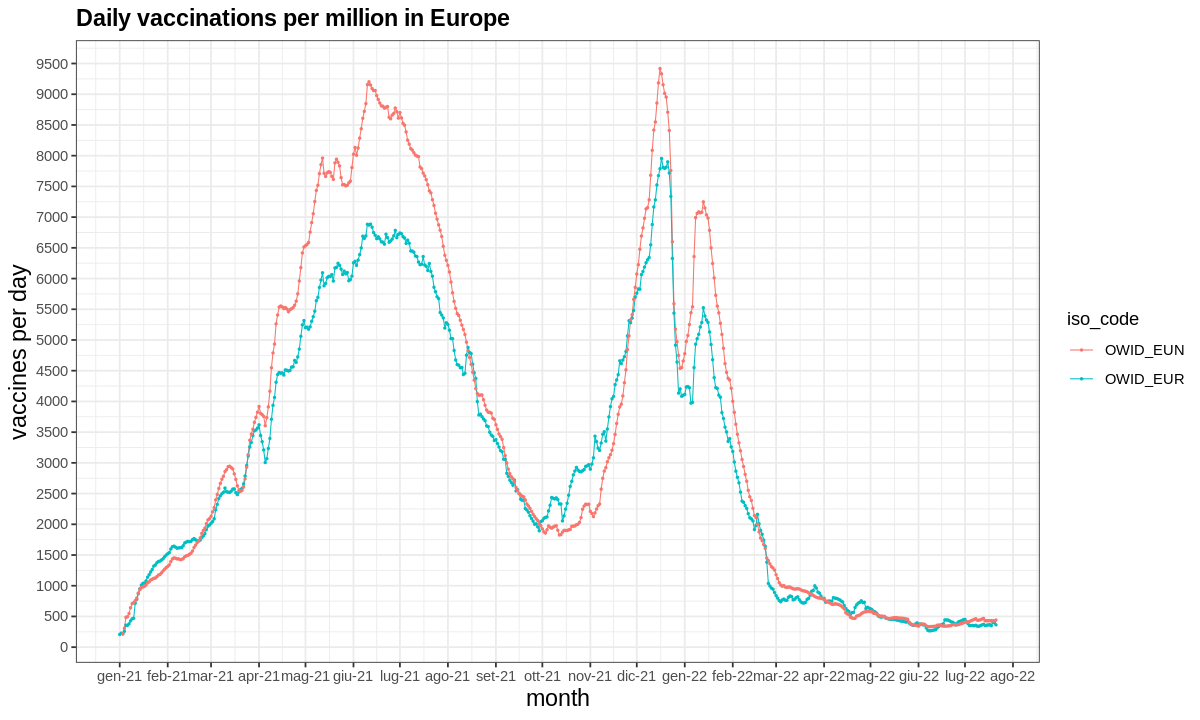

In [20]:
eur <- filter(vaccines, vaccines$iso_code %in% c('OWID_EUR', 'OWID_EUN'))
head(eur, 5)

options(repr.plot.width=10, repr.plot.height=6)
p <- ggplot (eur, aes(as.Date(date), daily_vaccinations_per_million, group = iso_code, colour=iso_code))
p + geom_line(aes(col = iso_code), linetype='solid', size = 0.3) + geom_point(aes(col = iso_code), size = 0.3) +
labs(title = 'Daily vaccinations per million in Europe', x='month', y='vaccines per day') +
theme_bw() +
scale_y_continuous(breaks = scales::pretty_breaks(n = 15)) +
theme(plot.title=element_text(size=14, face = 'bold'),
axis.title.x=element_text(size=14),
axis.title.y=element_text(size=14)) +
scale_x_date(date_breaks = '1 months', date_labels='%b-%y')


### 4.2.2
study the data structure and produce few relevant plots of your taste

I chose to study the number of *vaccinated* and *fully vaccinated* people in the different continets, and to study the difference between the absolute number of people vaccinated versus the number of people vaccinated *per hundred*, in the continents.

Finally, I performed the same analysis in Italy and in the UK.

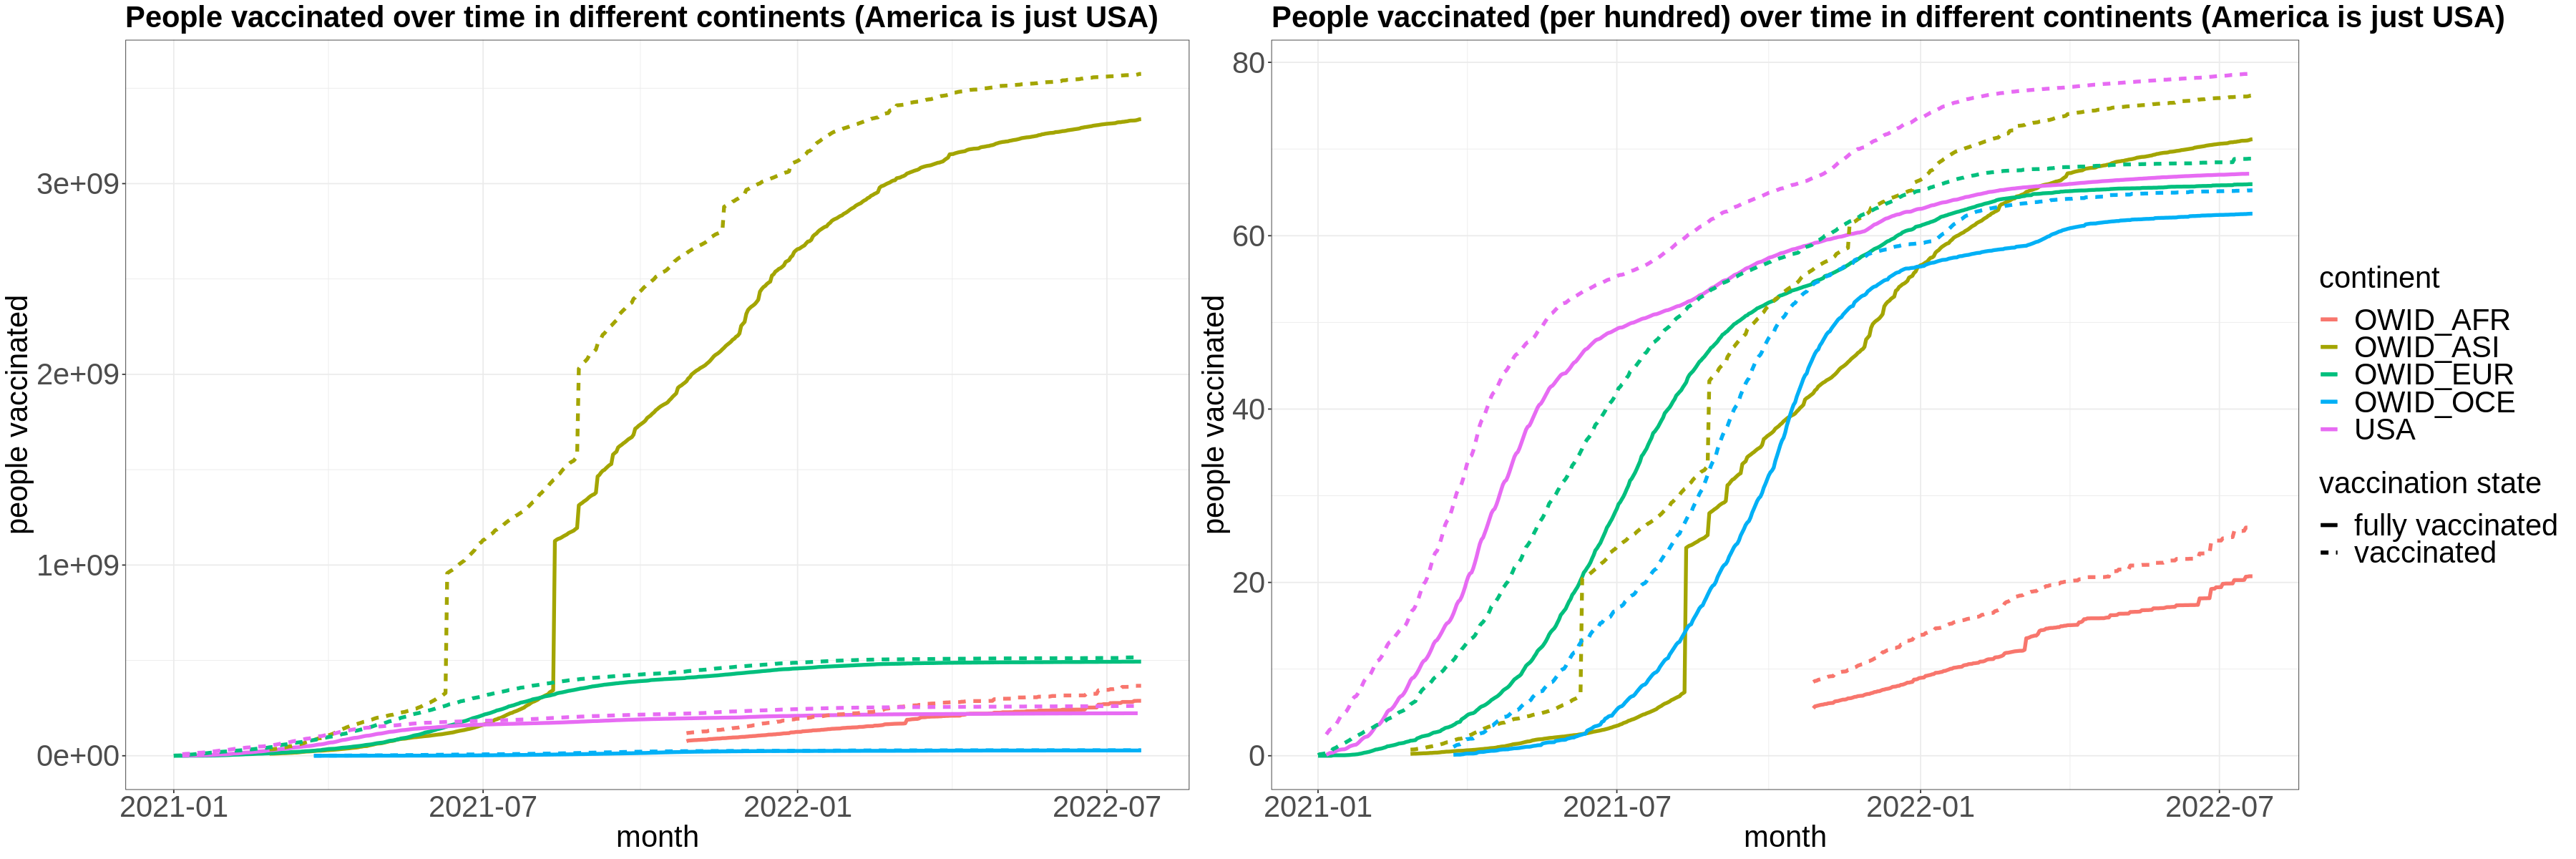

In [21]:
continents <- filter(vaccines, vaccines$iso_code %in% c('OWID_EUR', 'OWID_AFR', 'OWID_ASI', 'USA', 'OWID_OCE'))

options(repr.plot.width=30, repr.plot.height=10)
pp <- ggplot() + geom_line(continents, mapping = aes(as.Date(date), people_fully_vaccinated, group = iso_code, colour=iso_code, linetype = 'fully vaccinated'), size = 1.5) +
geom_line(continents, mapping = aes(as.Date(date), people_vaccinated, group = iso_code, colour=iso_code, linetype ='vaccinated'), size = 1.5) +
labs(title = 'People vaccinated over time in different continents (America is just USA)', x='month', y='people vaccinated', col='continent', linetype ='vaccination state') +
theme_bw() +
theme(plot.title=element_text(size=25, face = 'bold'))+
theme(axis.title.x = element_text(size=25)) + theme(axis.text.x = element_text(size=25)) +
theme(axis.title.y = element_text(size=25), axis.text.y = element_text(size=25)) +
theme(legend.title = element_text(size = 25), legend.text = element_text(size = 25)) +
theme(legend.position="none")


pr <- ggplot() + geom_line(continents, mapping = aes(as.Date(date), people_fully_vaccinated_per_hundred, group = iso_code, colour=iso_code, linetype = 'fully vaccinated'), size = 1.5) +
geom_line(continents, mapping = aes(as.Date(date), people_vaccinated_per_hundred, group = iso_code, colour=iso_code, linetype ='vaccinated'), size = 1.5) +
labs(title = 'People vaccinated (per hundred) over time in different continents (America is just USA)', x='month', y='people vaccinated', col='continent', linetype ='vaccination state') +
theme_bw() +
theme(plot.title=element_text(size=25, face = 'bold'))+
theme(axis.title.x = element_text(size=25)) + theme(axis.text.x = element_text(size=25)) +
theme(axis.title.y = element_text(size=25), axis.text.y = element_text(size=25)) +
theme(legend.title = element_text(size = 25), legend.text = element_text(size = 25))

grid.arrange(pp, pr, nrow=1, widths=c(13, 15))

It is interesting to note how, when considering absolute numbers, Asia has the greater number of people vaccinated, but when comparing the number of people vaccinated per hundred the percentages are quite similar in the different continents.

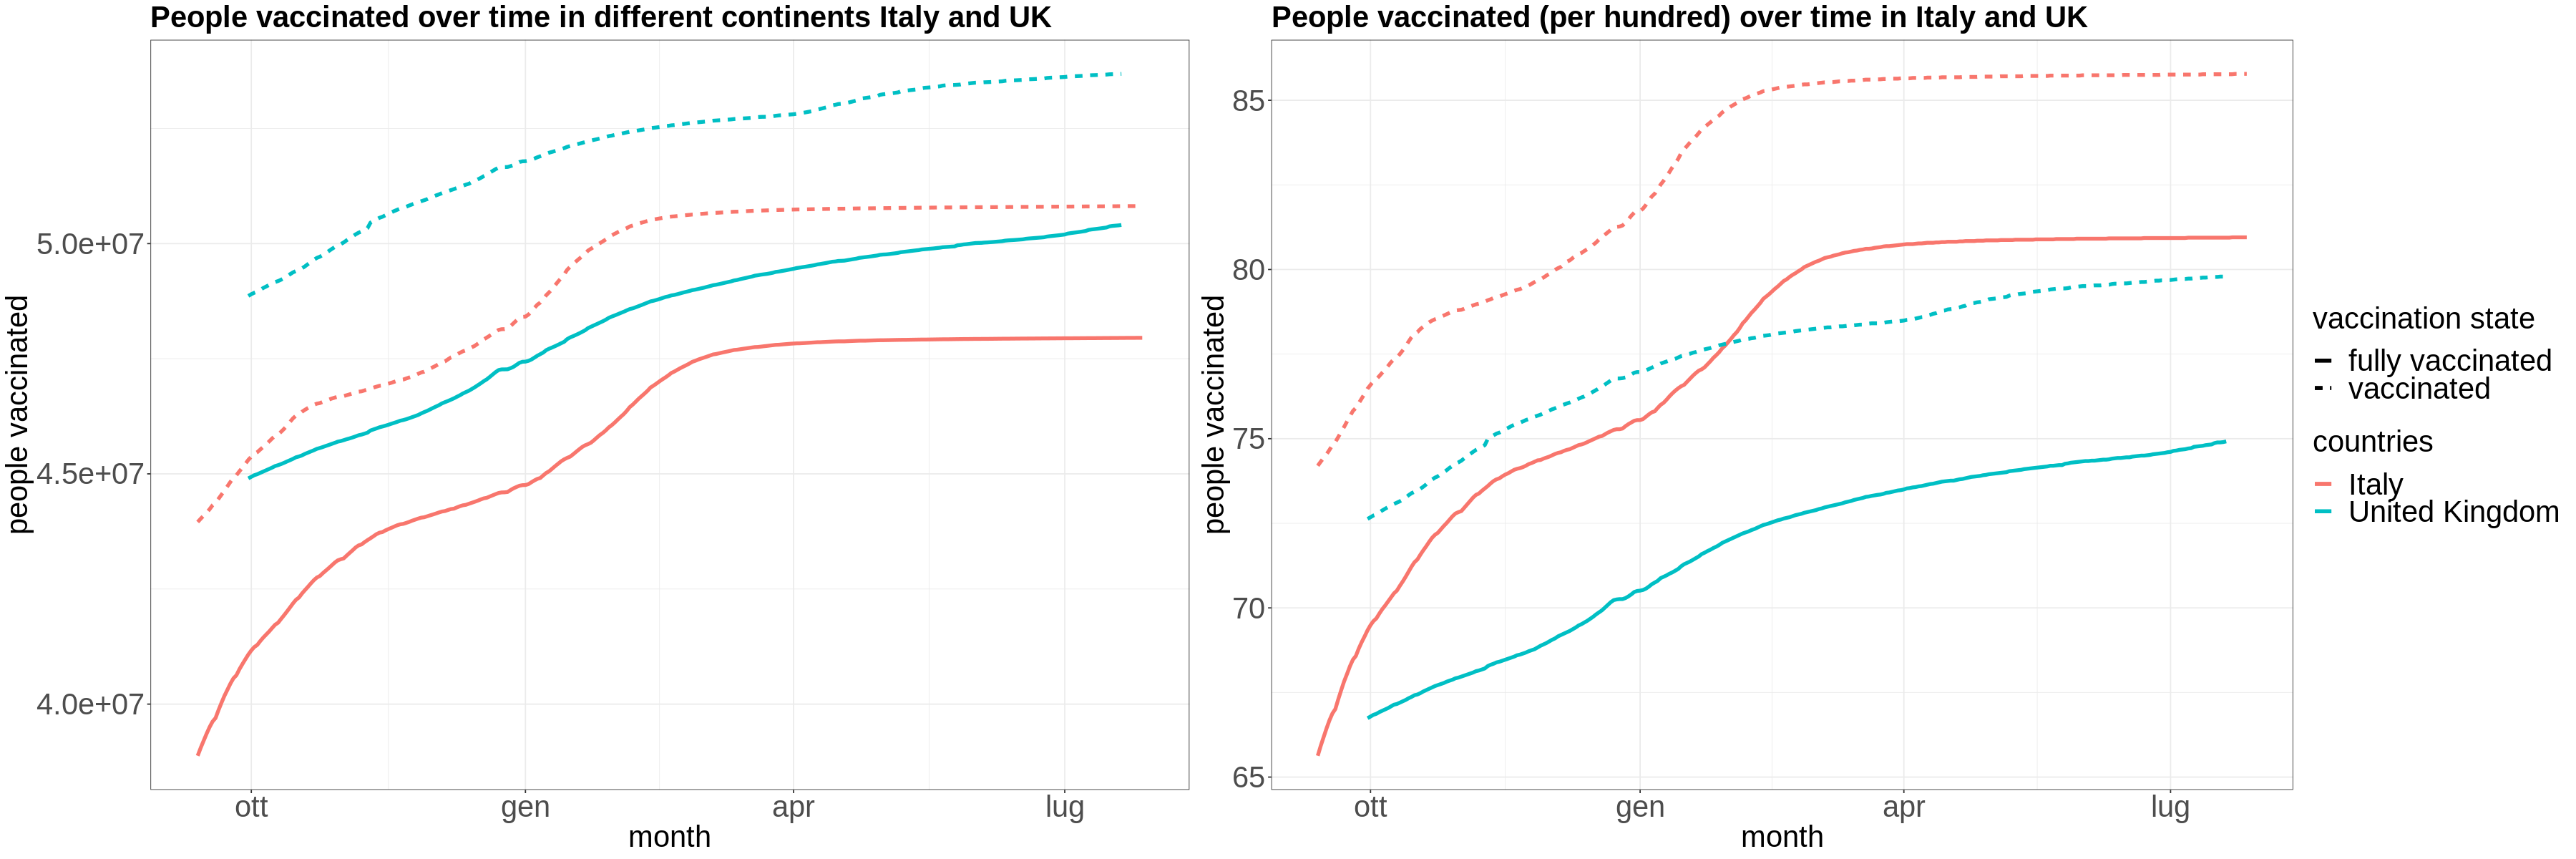

In [22]:
countries <- filter(vaccines, vaccines$location %in% c('Italy', 'United Kingdom'))

options(repr.plot.width=30, repr.plot.height=10)
pp <- ggplot() + geom_line(countries, mapping = aes(as.Date(date), people_fully_vaccinated, group = location, colour=location, linetype = 'fully vaccinated'), size = 1.5) +
geom_line(countries, mapping = aes(as.Date(date), people_vaccinated, group = iso_code, colour=location, linetype ='vaccinated'), size = 1.5) +
labs(title = 'People vaccinated over time in different continents Italy and UK', x='month', y='people vaccinated', col='countries', linetype ='vaccination state') +
theme_bw() +
theme(plot.title=element_text(size=25, face = 'bold'))+
theme(axis.title.x = element_text(size=25)) + theme(axis.text.x = element_text(size=25)) +
theme(axis.title.y = element_text(size=25), axis.text.y = element_text(size=25)) +
theme(legend.title = element_text(size = 25), legend.text = element_text(size = 25)) +
theme(legend.position="none")


pr <- ggplot() + geom_line(countries, mapping = aes(as.Date(date), people_fully_vaccinated_per_hundred, group = location, colour=location, linetype = 'fully vaccinated'), size = 1.5) +
geom_line(countries, mapping = aes(as.Date(date), people_vaccinated_per_hundred, group = iso_code, colour=location, linetype ='vaccinated'), size = 1.5) +
labs(title = 'People vaccinated (per hundred) over time in Italy and UK', x='month', y='people vaccinated', col='countries', linetype ='vaccination state') +
theme_bw() +
theme(plot.title=element_text(size=25, face = 'bold'))+
theme(axis.title.x = element_text(size=25)) + theme(axis.text.x = element_text(size=25)) +
theme(axis.title.y = element_text(size=25), axis.text.y = element_text(size=25)) +
theme(legend.title = element_text(size = 25), legend.text = element_text(size = 25))

grid.arrange(pp, pr, nrow=1, widths=c(13, 15))